# Universe Machine

# Notes


TODO:
* Once things are restructured get this ready for PR
* https://docs.google.com/document/d/1kRZUw_nHksmnfgu_u6OtERTrl_w-xgio5t7WndmFQPA/edit
* https://redwoodforest.slack.com/archives/D6UA26L6R/p1515102490000636
* Decide how to drop data in the heatmaps
* Sanity check that halo scatter matches stellar scatter (based off the slope): https://redwoodforest.slack.com/archives/C8G02V8F9/p1516236118000202

New TODO:

# Preamble, Imports, Plotting config

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [11]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits
import time

# My libs
import data
import plots as p
import smhm_fit
import fits


# when we mess up imports
from importlib import reload

In [3]:
matplotlib.rcParams.update({'figure.dpi': 300})
def fig_font_size(size = 12):
    matplotlib.rcParams.update({'font.size': size})
fig_font_size()

# Data

In [4]:
# Note that we have already cut (as of 1 Feb) to centrals with mp > 12
# https://github.com/dr-guangtou/hsc_um2/blob/master/scripts/reduce_um_data_size.py
centrals, satellites = data.load()
print(np.log10(np.min(centrals["mp"])))
print(len(centrals))

11.50023647482564
1076948


### Vis raw data

[None, Text(0,0.5,'Count'), Text(0.5,0,'HM / Peak HM')]

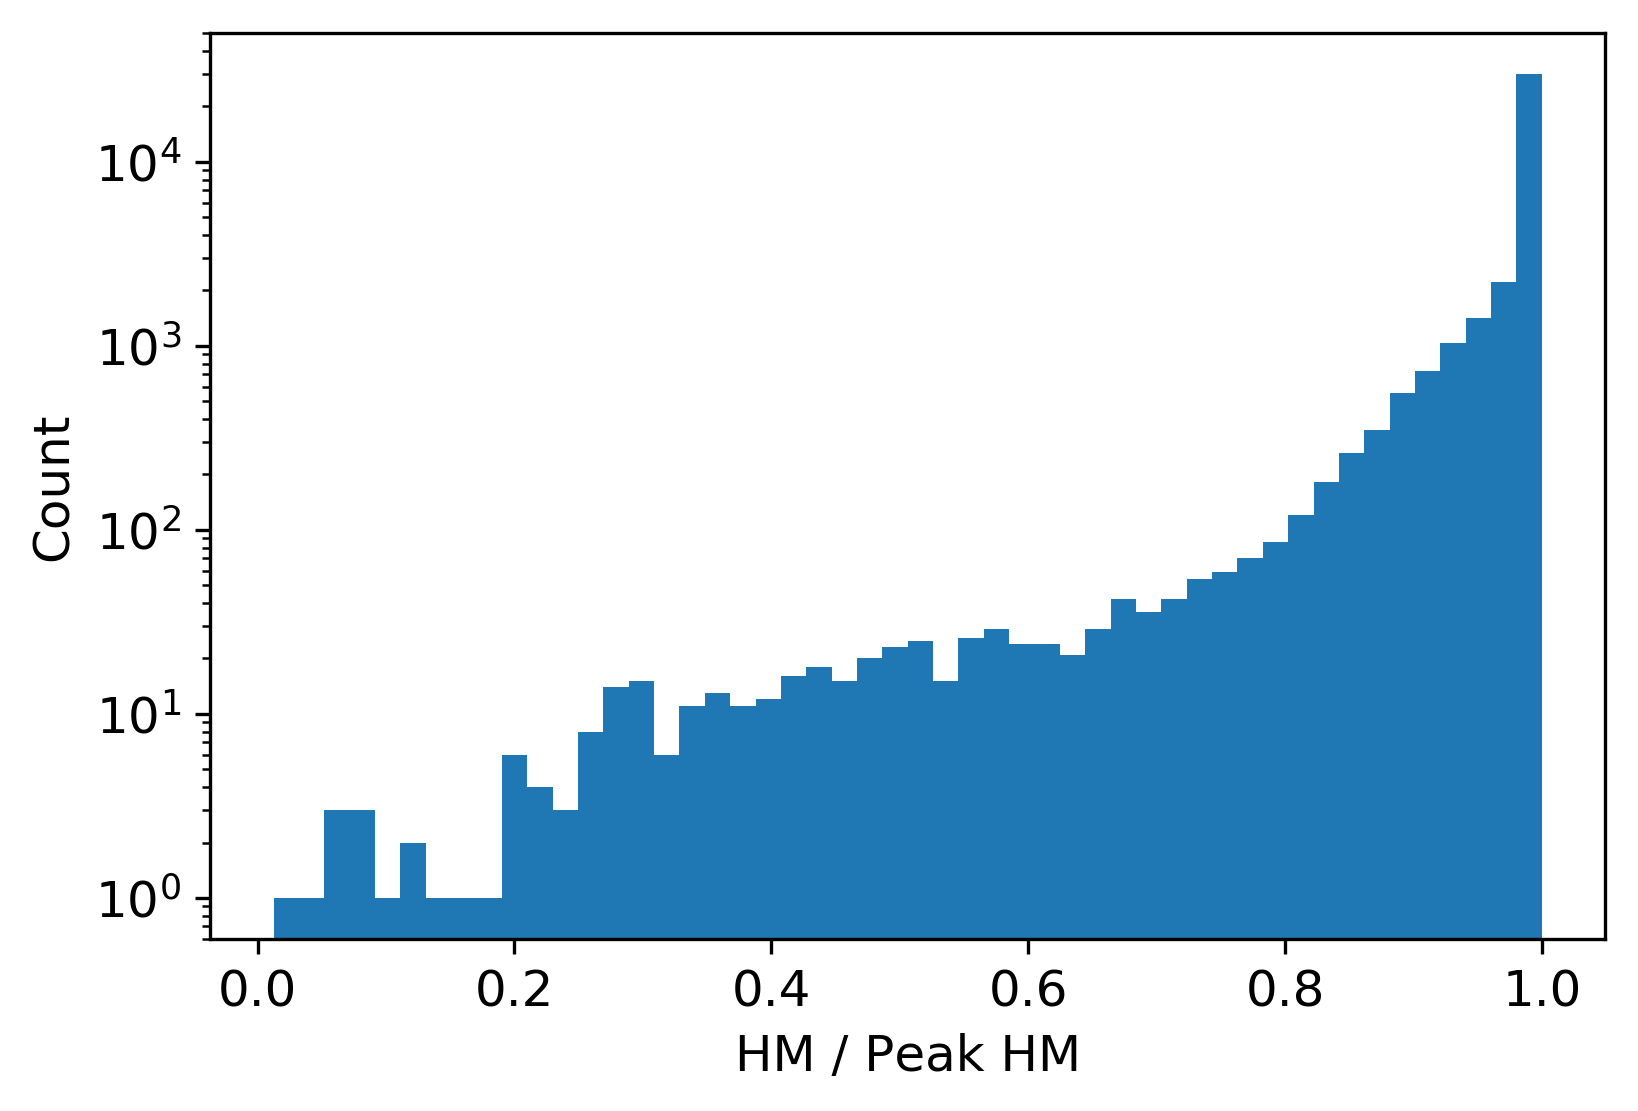

In [91]:
d = data_stellar_cut["cen"]["data"]
hm_phm_ratio = d["m"] / d["mp"]

fig, ax = plt.subplots()
ax.hist(hm_phm_ratio, bins=50)
ax.set(
    yscale="log",
    ylabel="Count",
    xlabel="HM / Peak HM",
)

In [93]:
d.dtype

dtype([('id', '<i8'), ('upid', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8'), ('mvir', '<f8'), ('rvir', '<f8'), ('rs', '<f8'), ('Halfmass_Scale', '<f8'), ('scale_of_last_MM', '<f8'), ('M200b', '<f8'), ('M200c', '<f8'), ('Acc_Rate_Inst', '<f8'), ('Acc_Rate_100Myr', '<f8'), ('Acc_Rate_1*Tdyn', '<f8'), ('Acc_Rate_2*Tdyn', '<f8'), ('Acc_Rate_Mpeak', '<f8'), ('Vmax@Mpeak', '<f8')])

In [94]:
d  = data_stellar_cut["cen"]["data"], data_stellar_cut["halo"]["data"]
dh = data_stellar_cut["halo"]["data"]["id" == d["id"]]
sm_hm_ratio = (d["sm"] + d["icl"]) / d["m"]
cen_sm_perc = (d["sm"] + d["icl"]) / (dh["sm"] + dh["icl"])

plt.histogram(sm_hm_ratio, cen_sm_perc, bins=50)

TypeError: tuple indices must be integers or slices, not str

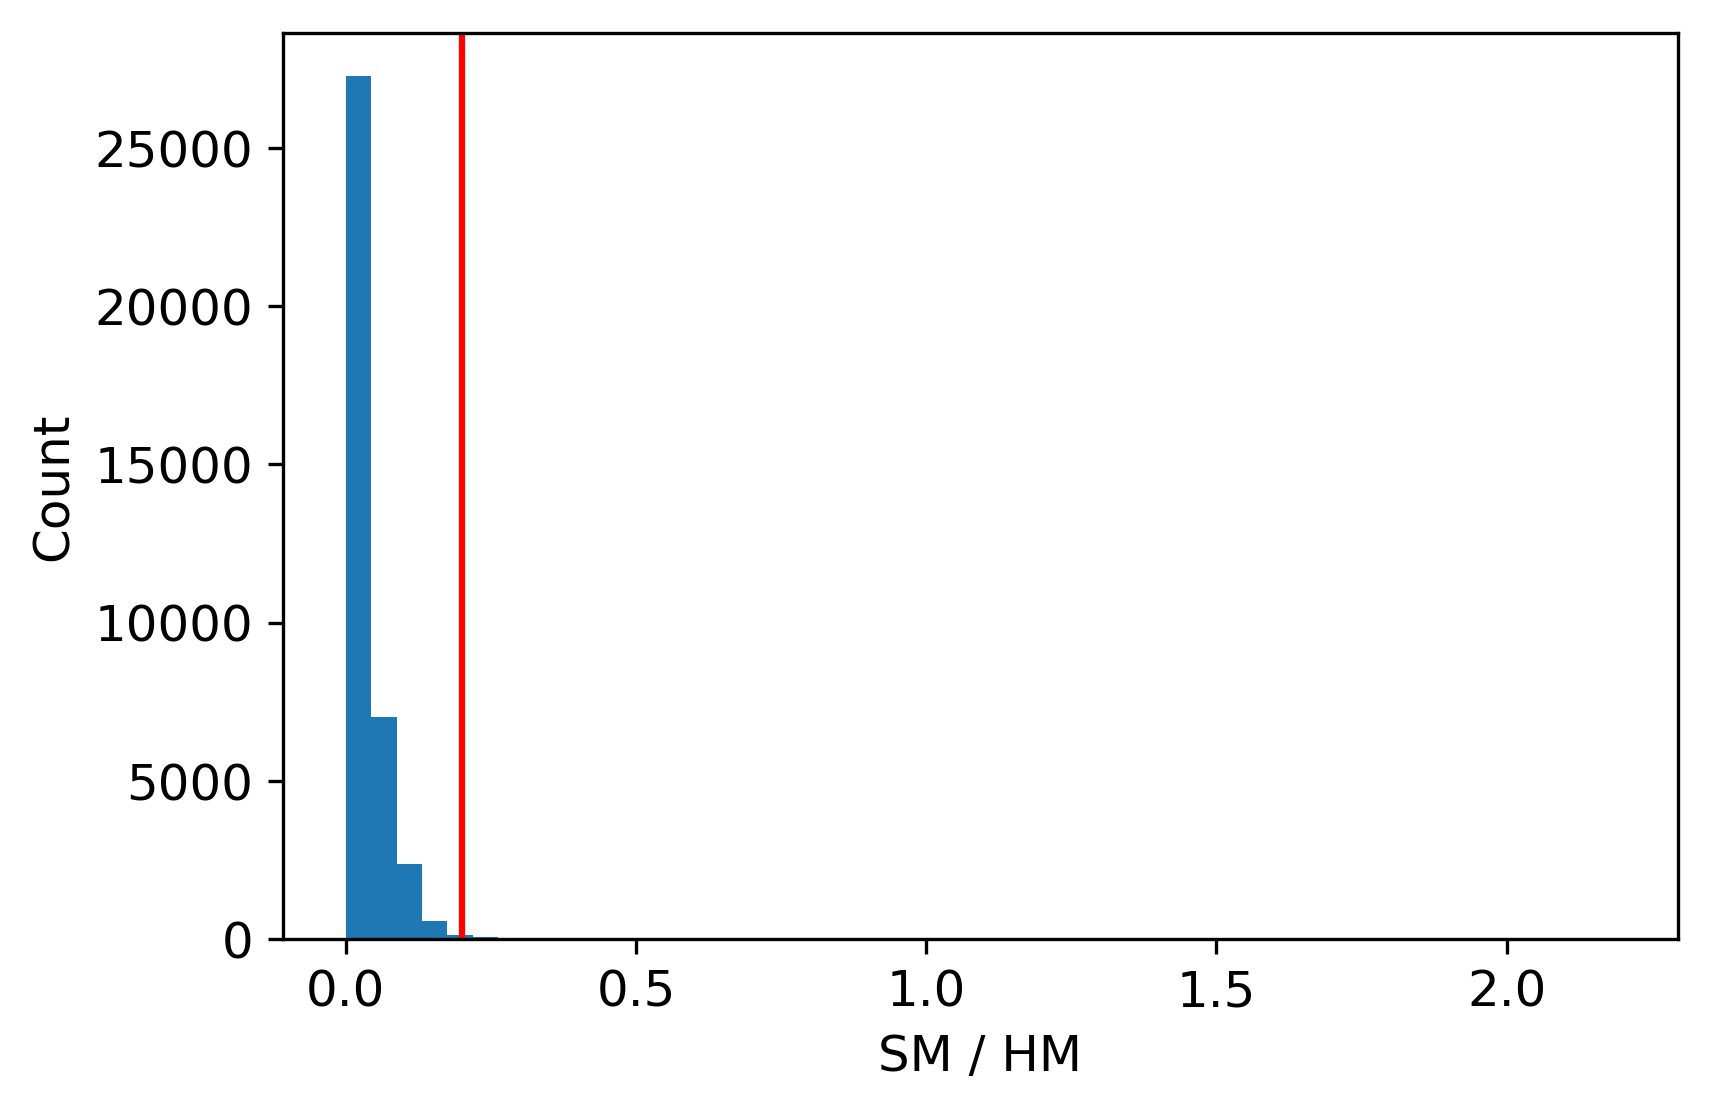

In [95]:
d = data_stellar_cut["cen"]["data"]
sm_hm_ratio = (d["sm"] + d["icl"]) / d["m"]
fig, ax = plt.subplots()
ax.hist(sm_hm_ratio, bins=50)
ax.set(
    ylabel="Count",
    xlabel="SM / HM",
)
ax.axvline(0.2, color="r")

/home/christopher/.virtualenvs/hsc_um2/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


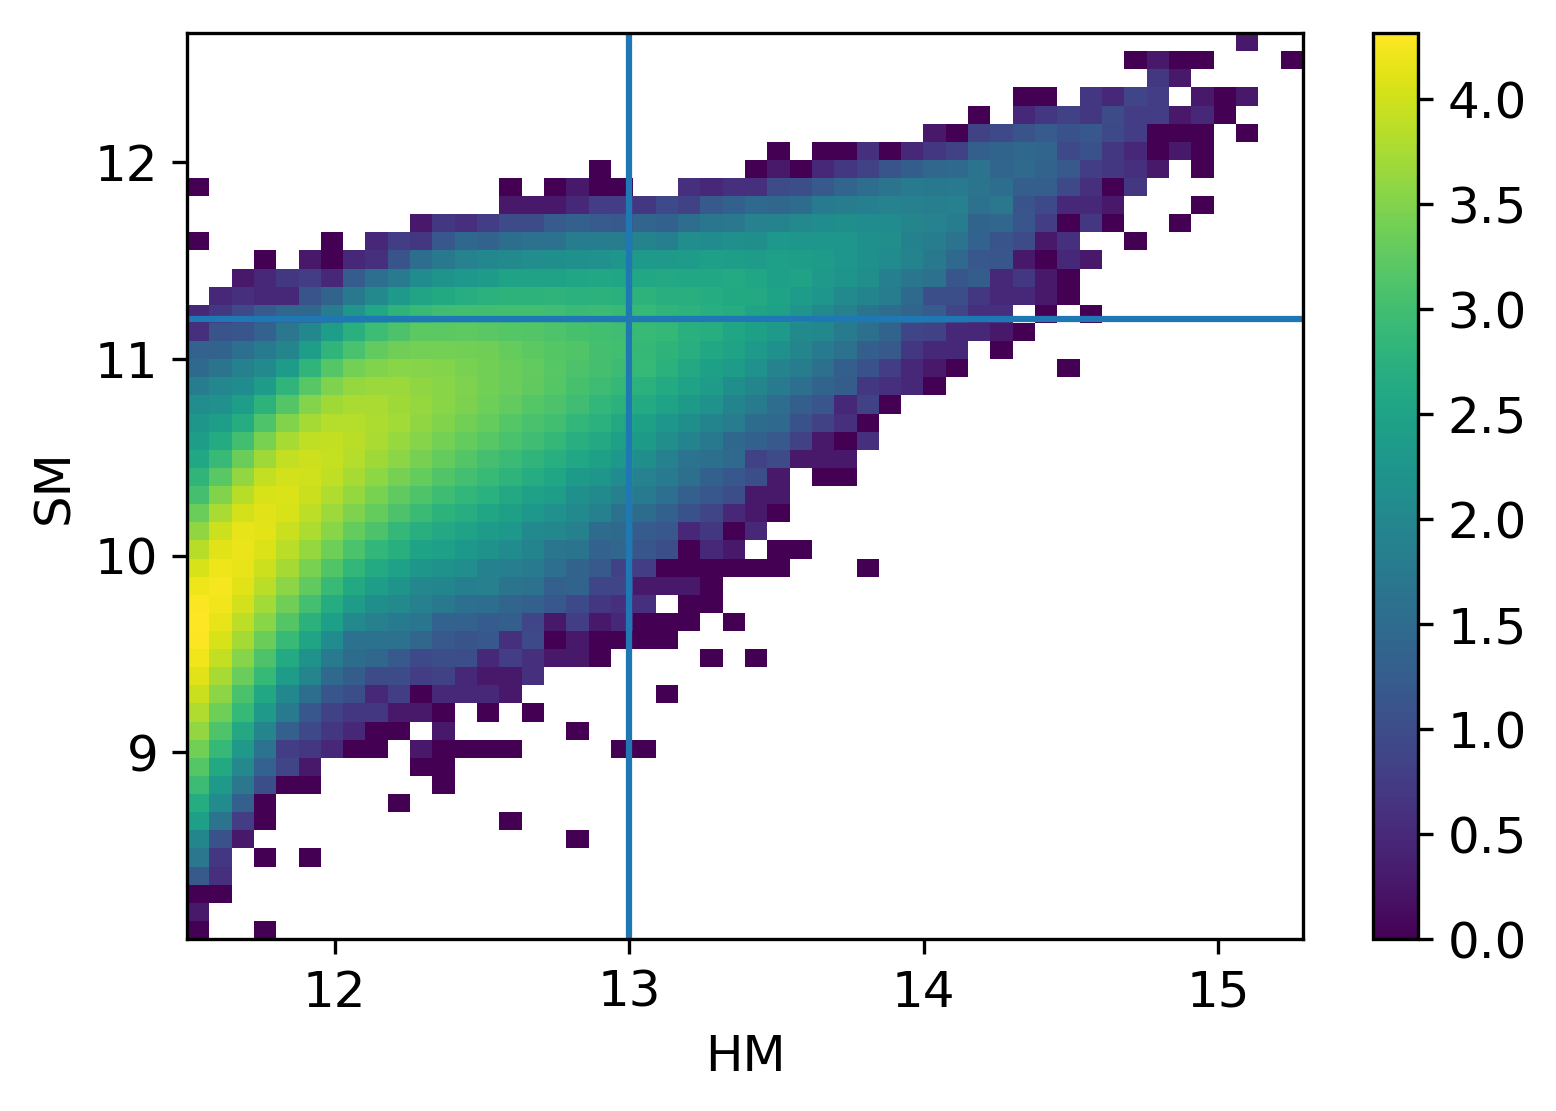

In [127]:
hm = np.log10(centrals["m"])
sm = np.log10(centrals["sm"] + centrals["icl"])
hist, x_edge, y_edge = np.histogram2d(hm, sm, bins=50)

hist = np.log10(hist)
hist = hist.T

fig, ax = plt.subplots()
img = ax.imshow(hist, origin="lower", extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], aspect="auto")
fig.colorbar(img)
ax.set(
    xlabel="HM",
    ylabel="SM",
)
ax.axhline(11.2)
ax.axvline(13)
#ax.axhline(12, c="r")
#ax.axvline(14.5, c="r")

## Process data

In [72]:
print(data_stellar_cut["cen"]["richness"][:10])

[(1.509e+14, 10.) (1.736e+12,  0.) (1.136e+14,  3.) (4.036e+13,  1.)
 (2.531e+13,  0.) (2.939e+13,  0.) (2.872e+13,  0.) (9.668e+12,  2.)
 (4.132e+12,  0.) (5.456e+12,  0.)]


In [79]:
print(data_stellar_cut["cen"]["richness"][:10])

[(1.509e+14, 10.) (1.736e+12,  0.) (1.136e+14,  3.) (4.036e+13,  1.)
 (2.531e+13,  0.) (2.939e+13,  0.) (2.872e+13,  0.) (9.668e+12,  2.)
 (4.132e+12,  0.) (5.456e+12,  0.)]


In [77]:
data_stellar_cut = data.sm_cuts_with_sats(centrals, satellites, smhm_fit.get_hm_at_fixed_sm_fit)
data_halo_cut = data.hm_cuts_with_sats(centrals, satellites, smhm_fit.get_sm_at_fixed_hm_fit)

[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 1e-09, 1e-09]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]


/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in power
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))
/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in multiply
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))


In [78]:
for key in data_stellar_cut.keys():
    print(key, len(data_stellar_cut[key]["data"]), len(data_halo_cut[key]["data"]))

cen 37477 36491
1 39061 36491
2 30094 36491
5 33983 36491
halo 34869 36491
insitu 33309 36490


In [81]:
for key in data_stellar_cut.keys():
    mass, csmf = fits.build_csmf(data_stellar_cut, key)
    data_stellar_cut[key]["smf"] = (mass, csmf) # note that these masses are log!
    if key is not "insitu":
        data_stellar_cut[key]["rmf"] = fits.build_rmf(data_stellar_cut[key]["richness"])

for key in data_halo_cut.keys():
    mass, csmf = fits.build_csmf(data_halo_cut, key)
    data_halo_cut[key]["smf"] = (mass, csmf) # note that these masses are log!
    if key is not "insitu":
        data_halo_cut[key]["rmf"] = fits.build_rmf(data_halo_cut[key]["richness"])

data_stellar_cut["cen"]["hmf"] = fits.build_chmf(data_stellar_cut, "cen")

In [82]:
print(data_halo_cut.keys())
print(data_halo_cut["cen"].keys())
print(data_stellar_cut["cen"].keys())

dict_keys(['cen', 1, 2, 5, 'halo', 'insitu'])
dict_keys(['data', 'fit', 'richness', 'smf', 'rmf'])
dict_keys(['data', 'fit', 'richness', 'smf', 'rmf', 'hmf'])


### Sanity check these fits

They all kinda look like power laws? A little too much like power laws.

Also some analysis of these fits in the paper

If we are going for a power law, we have
```
log(HM) = log(M1) + B log(SM / sm0)
HM = M1 * (SM/sm0)^B = M1 * SM^B / (sm0)^B = M1/sm0^B * SM^B
log(HM) = log(M1/sm0*B) + B*log(SM)
log(HM) = log(M1)-log(sm0) - log(B) + B*SM
```

In [10]:
print("m1, sm0, beta, delta, gamma")
for key in data_halo_cut.keys():
    f = data_halo_cut[key]["fit"]
    print("{}, {:2f}, {:2f}, {:2f}, {:2f}, {:2f}".format(key, np.log10(f[0]), np.log10(f[1]), f[2], f[3], f[4]))

m1, sm0, beta, delta, gamma
cen, 12.935346, 10.954858, 0.382429, 0.224716, 1.649295
1, 12.883565, 11.130136, 0.779331, 0.156323, 1.026725
2, 14.112270, 11.979857, 1.120076, 0.000000, 0.828510
5, 13.284356, 11.514671, 0.524564, 0.210898, 0.923283
halo, 12.743339, 11.040177, 1.115193, 0.000000, 0.000000
insitu, 14.623166, 10.991189, 5.267735, 0.044830, 1.424472


In [11]:
def get_power_law_coeffs(m1, sm0, beta, delta, gamma):
    if np.abs(gamma) > 1e-9 or np.abs(delta) > 1e-9:
        print("not a power law!")
        return
    # y = az^(b)
    a = np.log10(m1) - np.log10(sm0) - np.log10(beta)
    b = beta
    print("HM = {} * SM ^ {}".format(a, b))
    print("SM = {} * HM ^ {}".format(1/(a**(1/b)), 1/b))
for key in data_halo_cut.keys():
    print(key)
    get_power_law_coeffs(*data_halo_cut[key]["fit"])
for key in data_stellar_cut.keys():
    print(key)
    get_power_law_coeffs(*data_stellar_cut[key]["fit"])

cen
not a power law!
1
not a power law!
2
not a power law!
5
not a power law!
halo
HM = 1.6558125613553052 * SM ^ 1.1151927683521772
SM = 0.6362259462489653 * HM ^ 0.8967059582690915
insitu
not a power law!
cen
not a power law!
1
not a power law!
2
not a power law!
5
not a power law!
halo
not a power law!
insitu
not a power law!


In [12]:
for key in data_halo_cut.keys():
    print(data_halo_cut[key]["fit"])

[8.61679047e+12 9.01277003e+10 3.82429463e-01 2.24715716e-01
 1.64929498e+00]
[7.64830524e+12 1.34938585e+11 7.79331280e-01 1.56323057e-01
 1.02672478e+00]
[1.29500215e+14 9.54677874e+11 1.12007601e+00 4.80073976e-13
 8.28510376e-01]
[1.92466918e+13 3.27093077e+11 5.24564316e-01 2.10898254e-01
 9.23282777e-01]
[5.53782464e+12 1.09692439e+11 1.11519277e+00 9.50682935e-10
 9.56077129e-10]
[4.19919270e+14 9.79915223e+10 5.26773502e+00 4.48304411e-02
 1.42447241e+00]


#### Plots

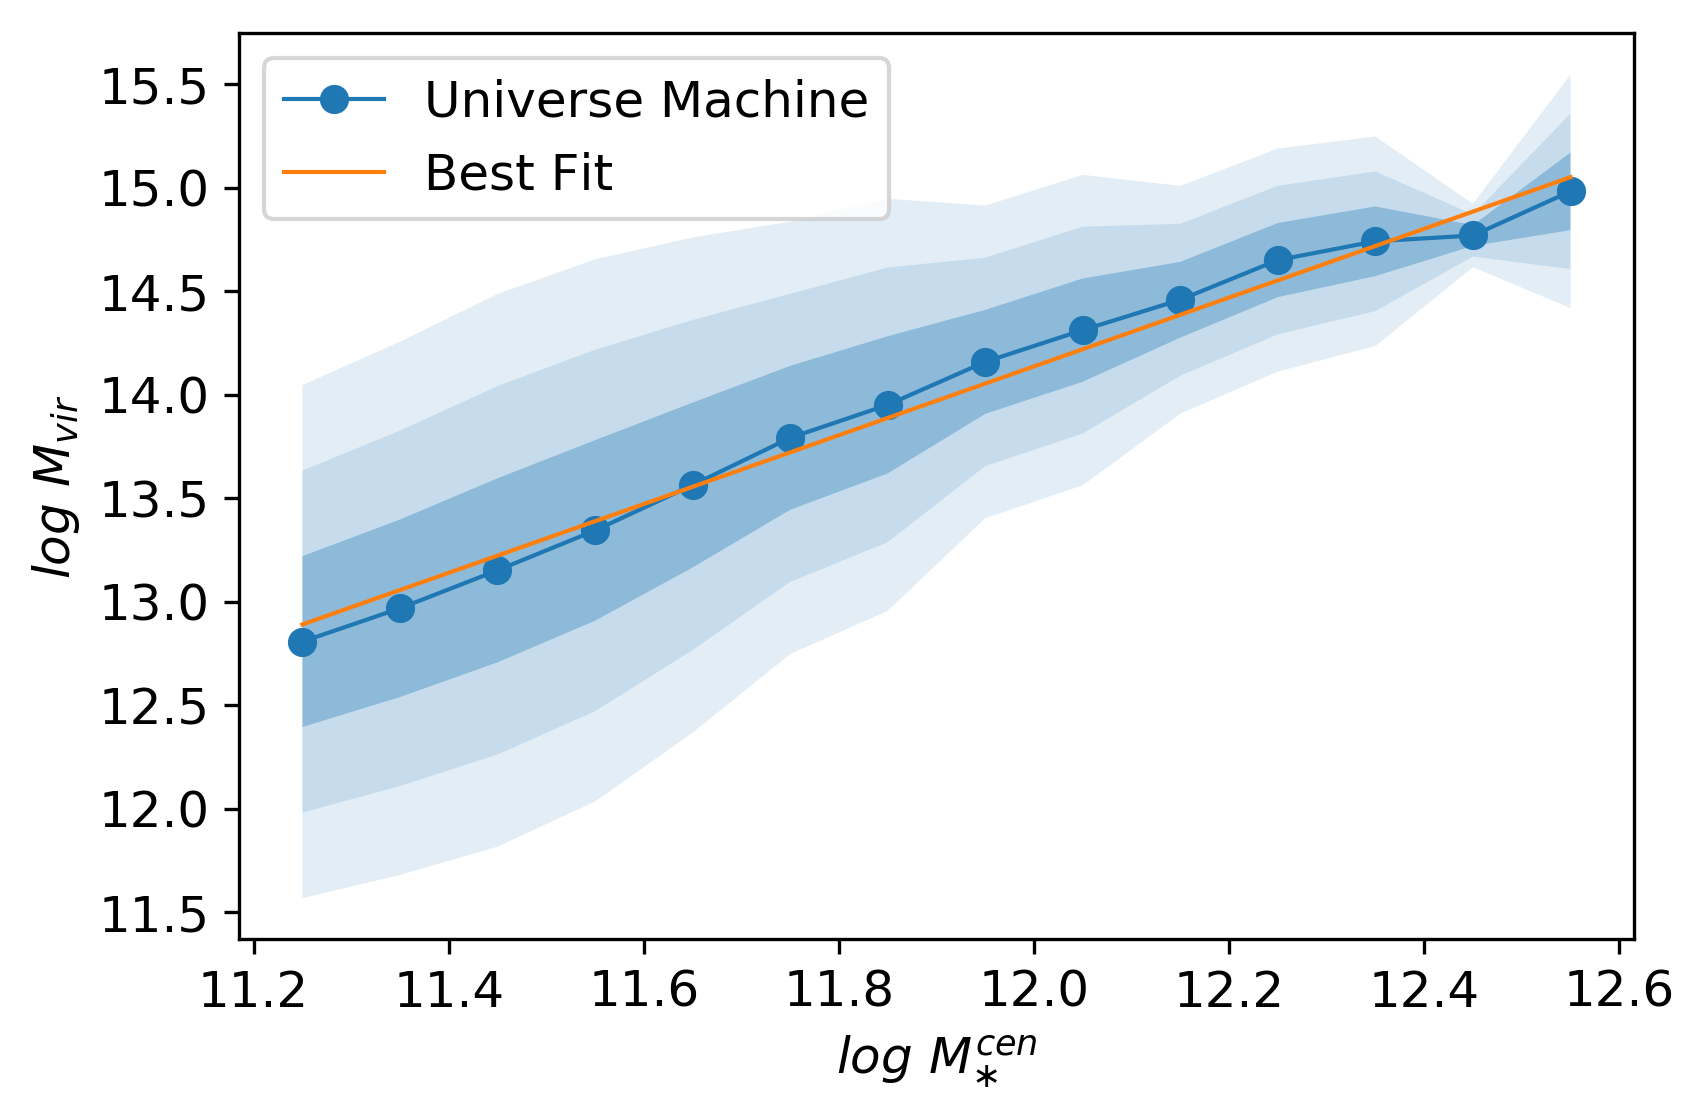

In [128]:
for key in ["cen"]: #data_stellar_cut.keys():
    p.sm_hm.dm_vs_sm(data_stellar_cut[key]["data"], key, fit=data_stellar_cut[key]["fit"])

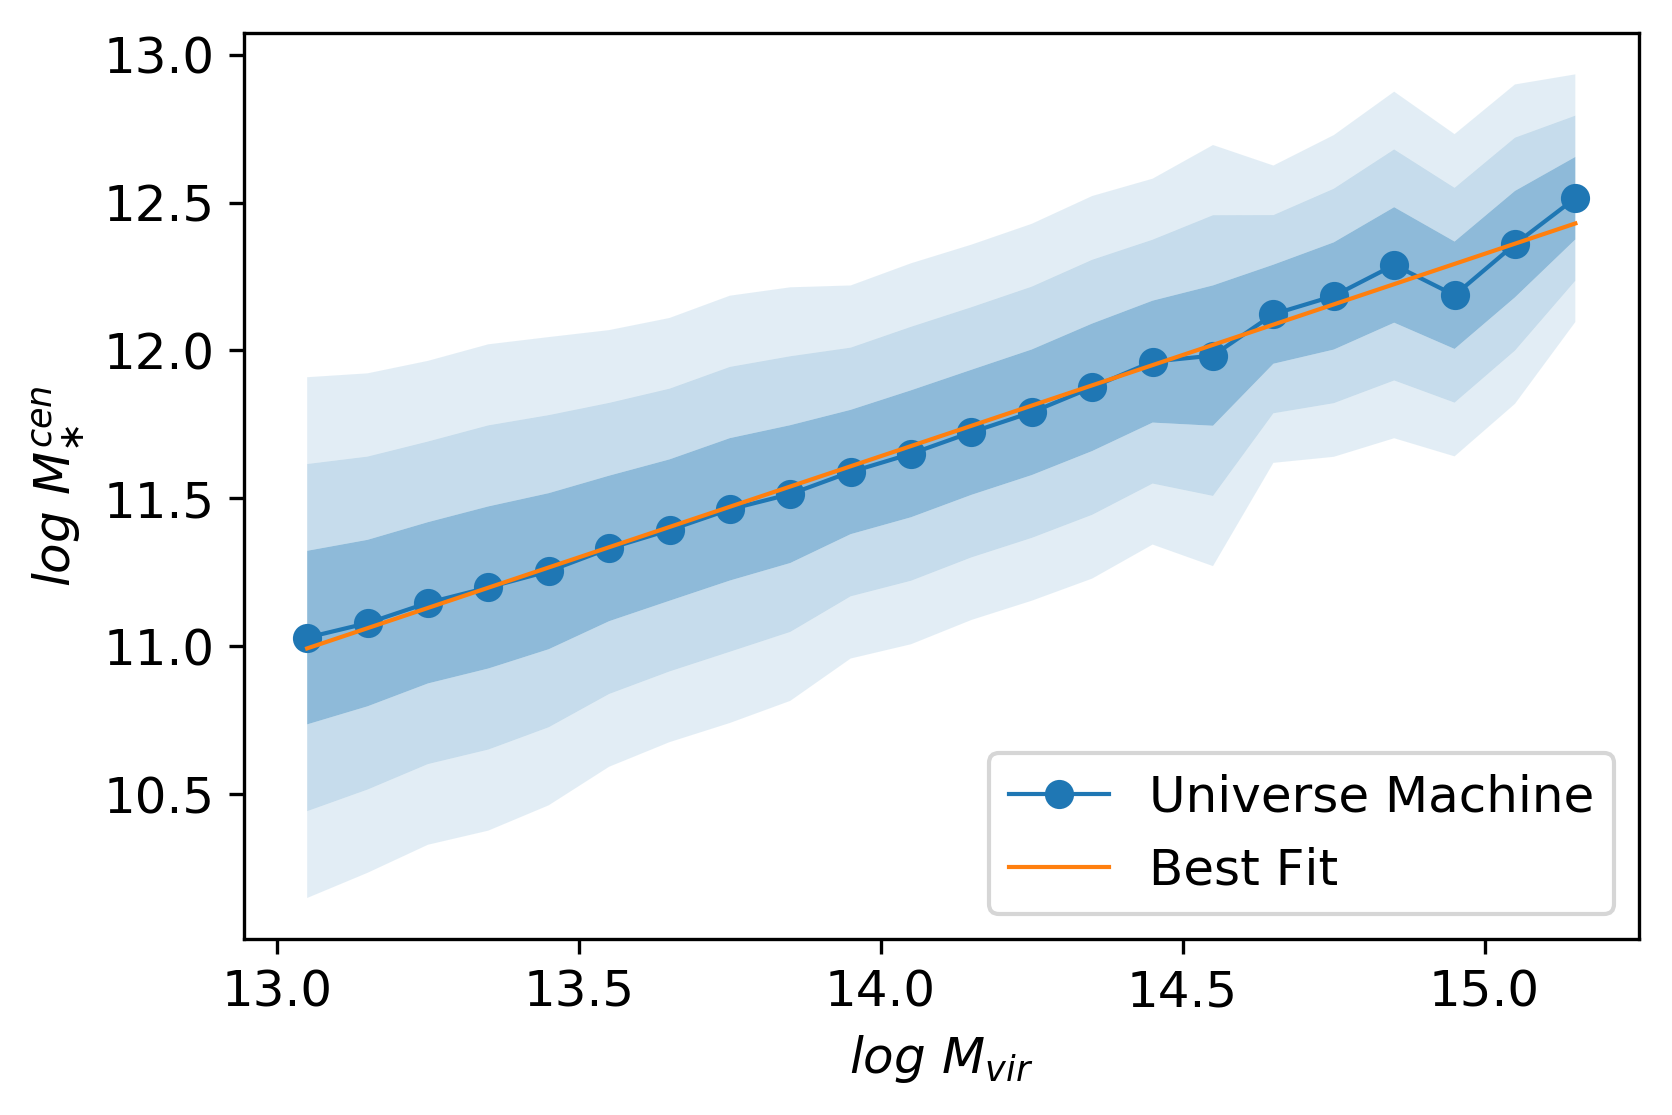

In [129]:
for key in ["cen"]:#data_halo_cut.keys():
    p.sm_hm.sm_vs_dm(data_halo_cut[key]["data"], key, fit=data_halo_cut[key]["fit"])

# Intro Plot

Intro everything by showing the SM-HM plot + some of the scatter plots (including lit values)

[14726, 9279, 5597, 3294, 1822, 974, 469, 203, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]


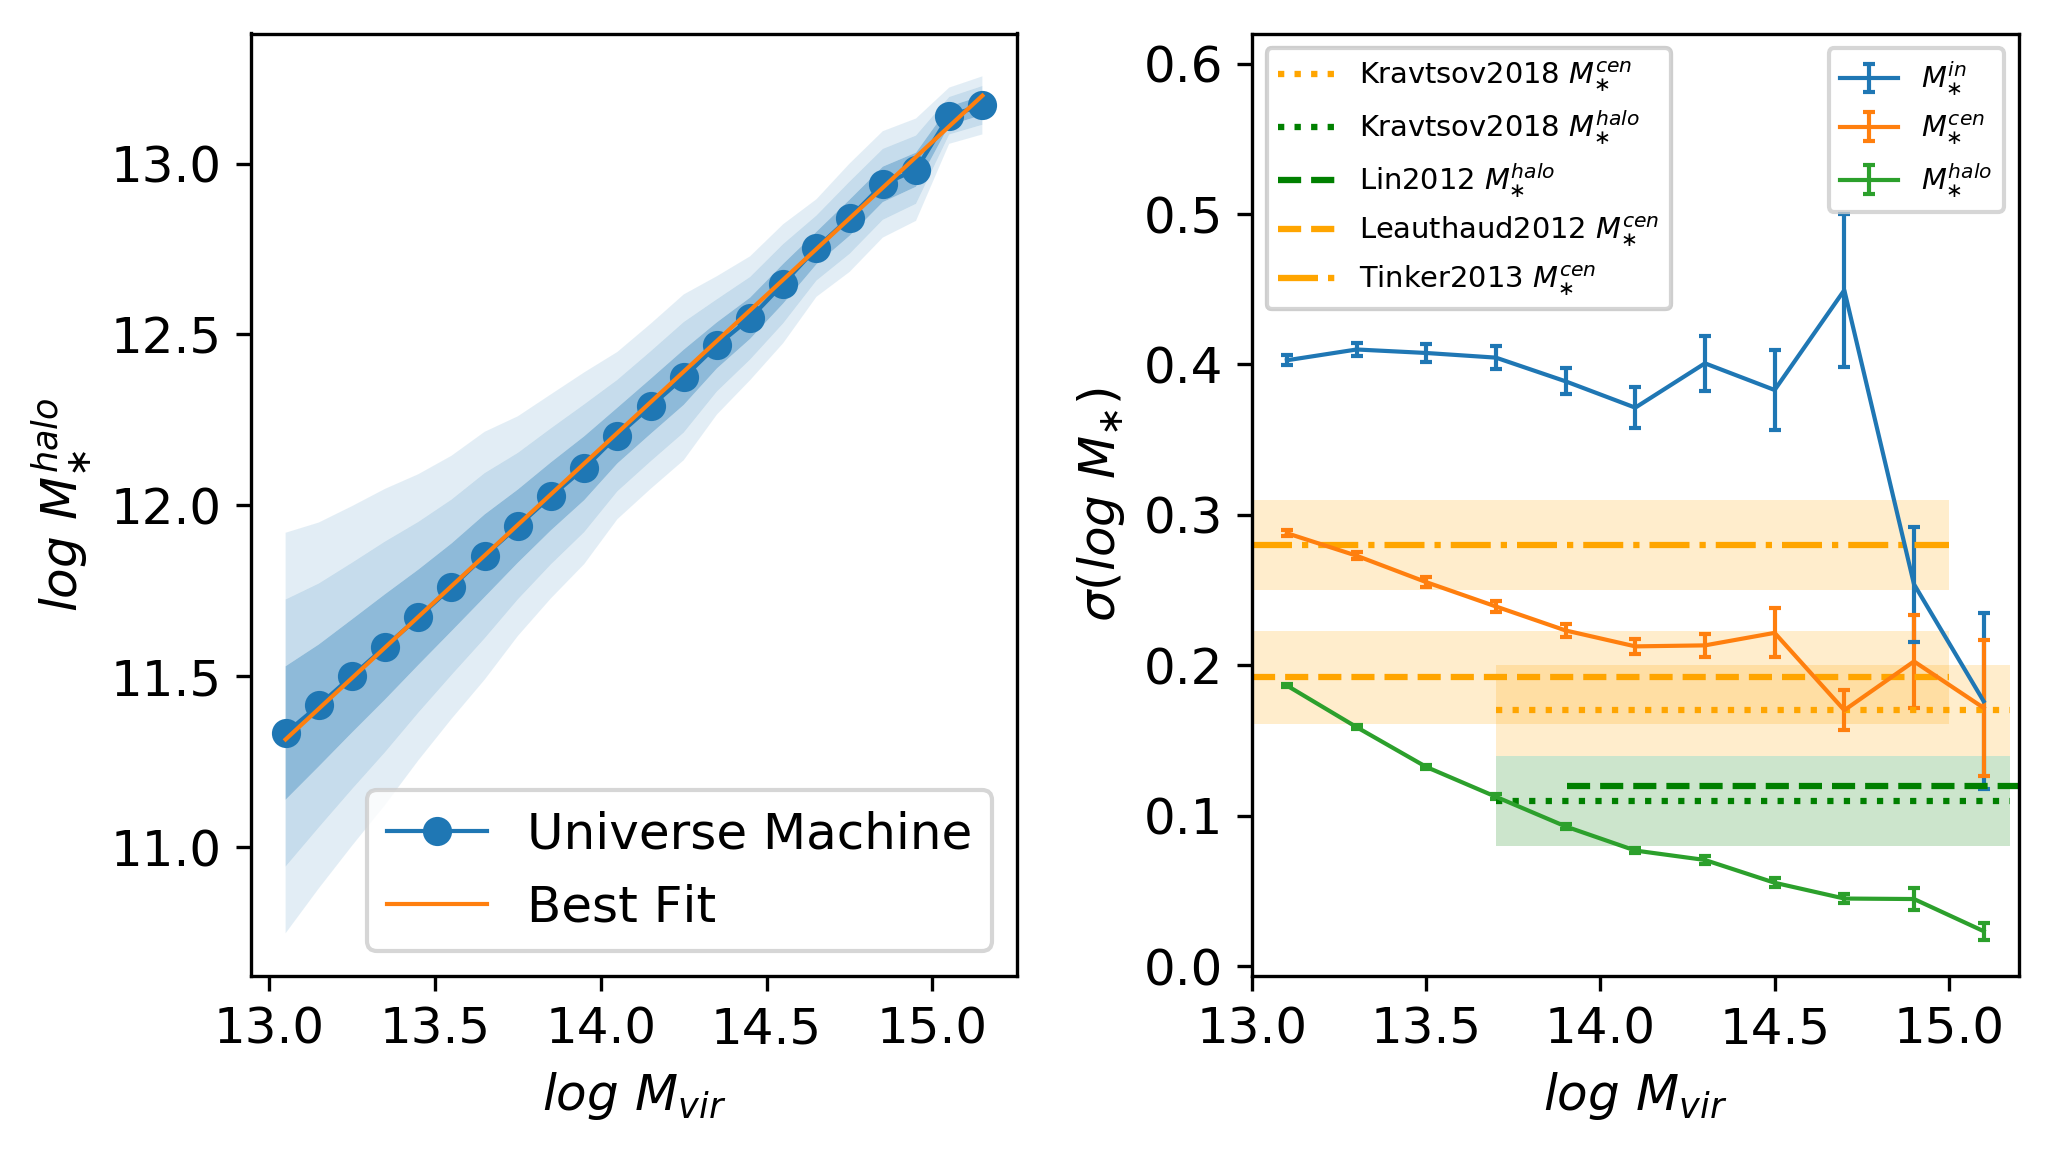

In [29]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(7, 4)
p.sm_hm.sm_vs_dm(data_halo_cut["halo"]["data"], "halo", fit=data_halo_cut["halo"]["fit"], ax=axes[0])
p.scatter.in_sm_at_fixed_hm_incl_lit(data_halo_cut, ax=axes[1])
plt.tight_layout()

# Scatter for various definitions of stellar mass

[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[11, 27, 62, 149, 353, 839, 1996, 4847, 11381]
[10, 27, 62, 150, 359, 833, 2048, 4806, 11415]
[12, 27, 60, 147, 350, 862, 2023, 4768, 11597]
[10, 27, 62, 150, 354, 831, 2053, 4811, 11479]
[10, 27, 63, 149, 359, 852, 2026, 4816, 11558]


(0.0, 0.45724854696013845)

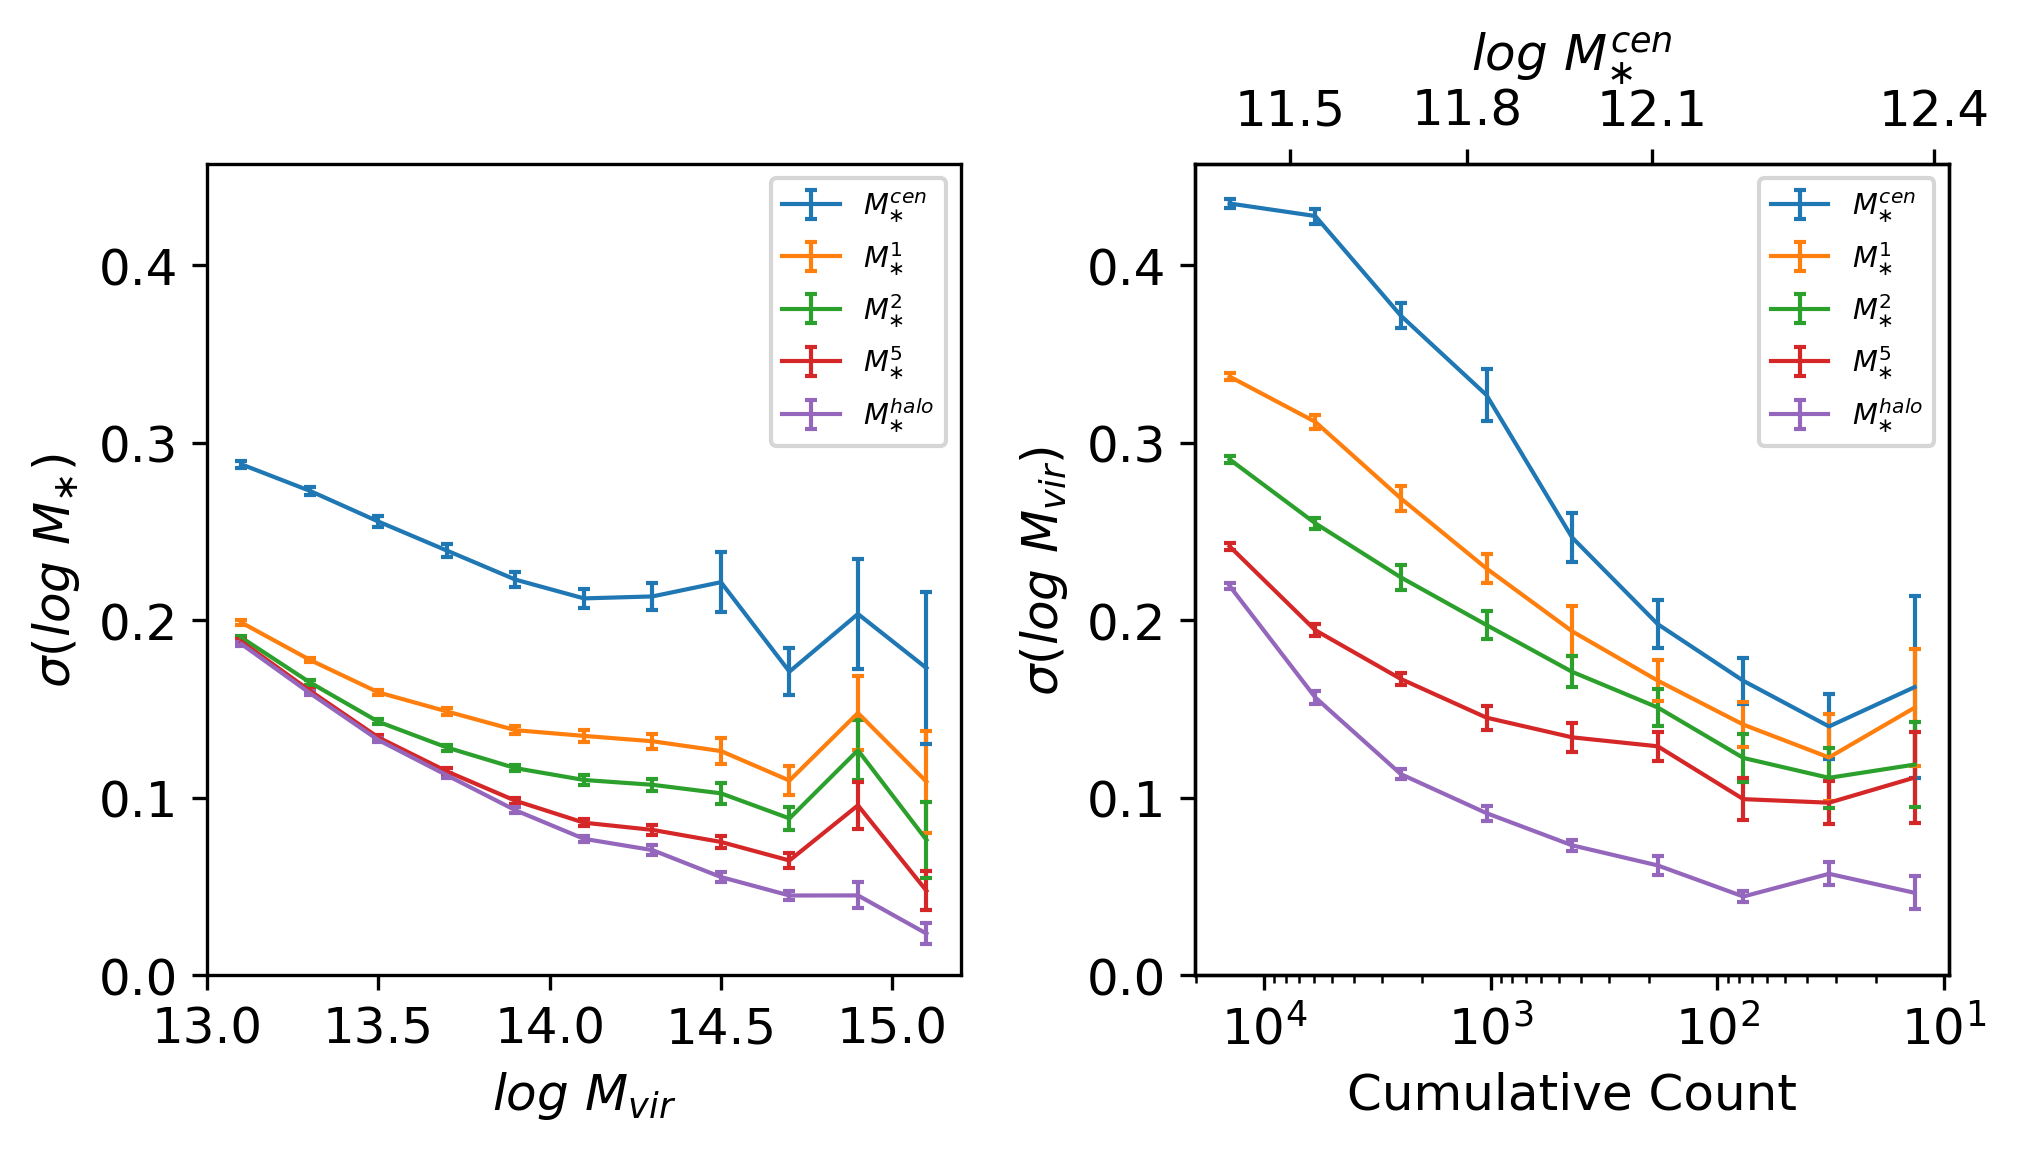

In [50]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(7, 4)
p.scatter.in_sm_at_fixed_hm(data_halo_cut, ax=axes[0])
p.scatter.in_hm_at_fixed_number_density(data_stellar_cut, ax=axes[1])
plt.tight_layout()
axes[0].set_ylim(axes[1].get_ylim())

# Stellar mass function for various SMs and vs HSC etc


In [38]:
fits.density_at_mass(data_stellar_cut, "cen", fits.mass_at_density(data_stellar_cut, "cen", 1e2))

100.0

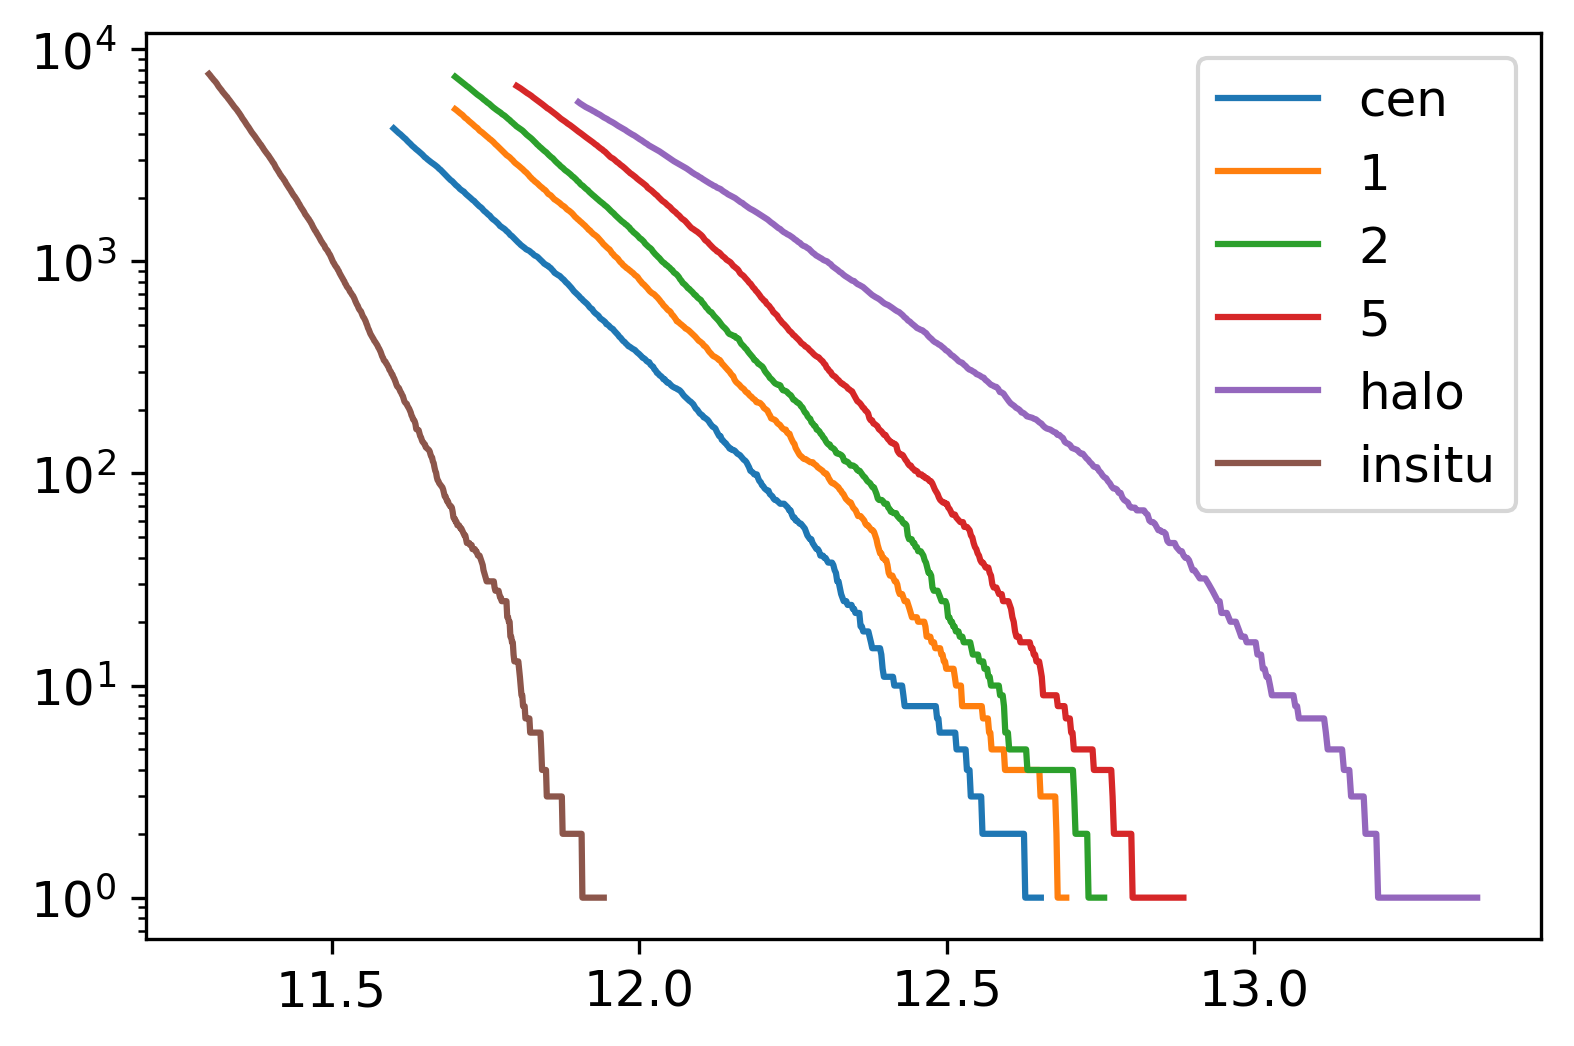

In [31]:
_, ax = plt.subplots()
for key in data_stellar_cut.keys():
    smf_data = data_stellar_cut[key]["smf"]
    ax.plot(smf_data[0], smf_data[1], label=key)
ax.set_yscale("log")
ax.legend()

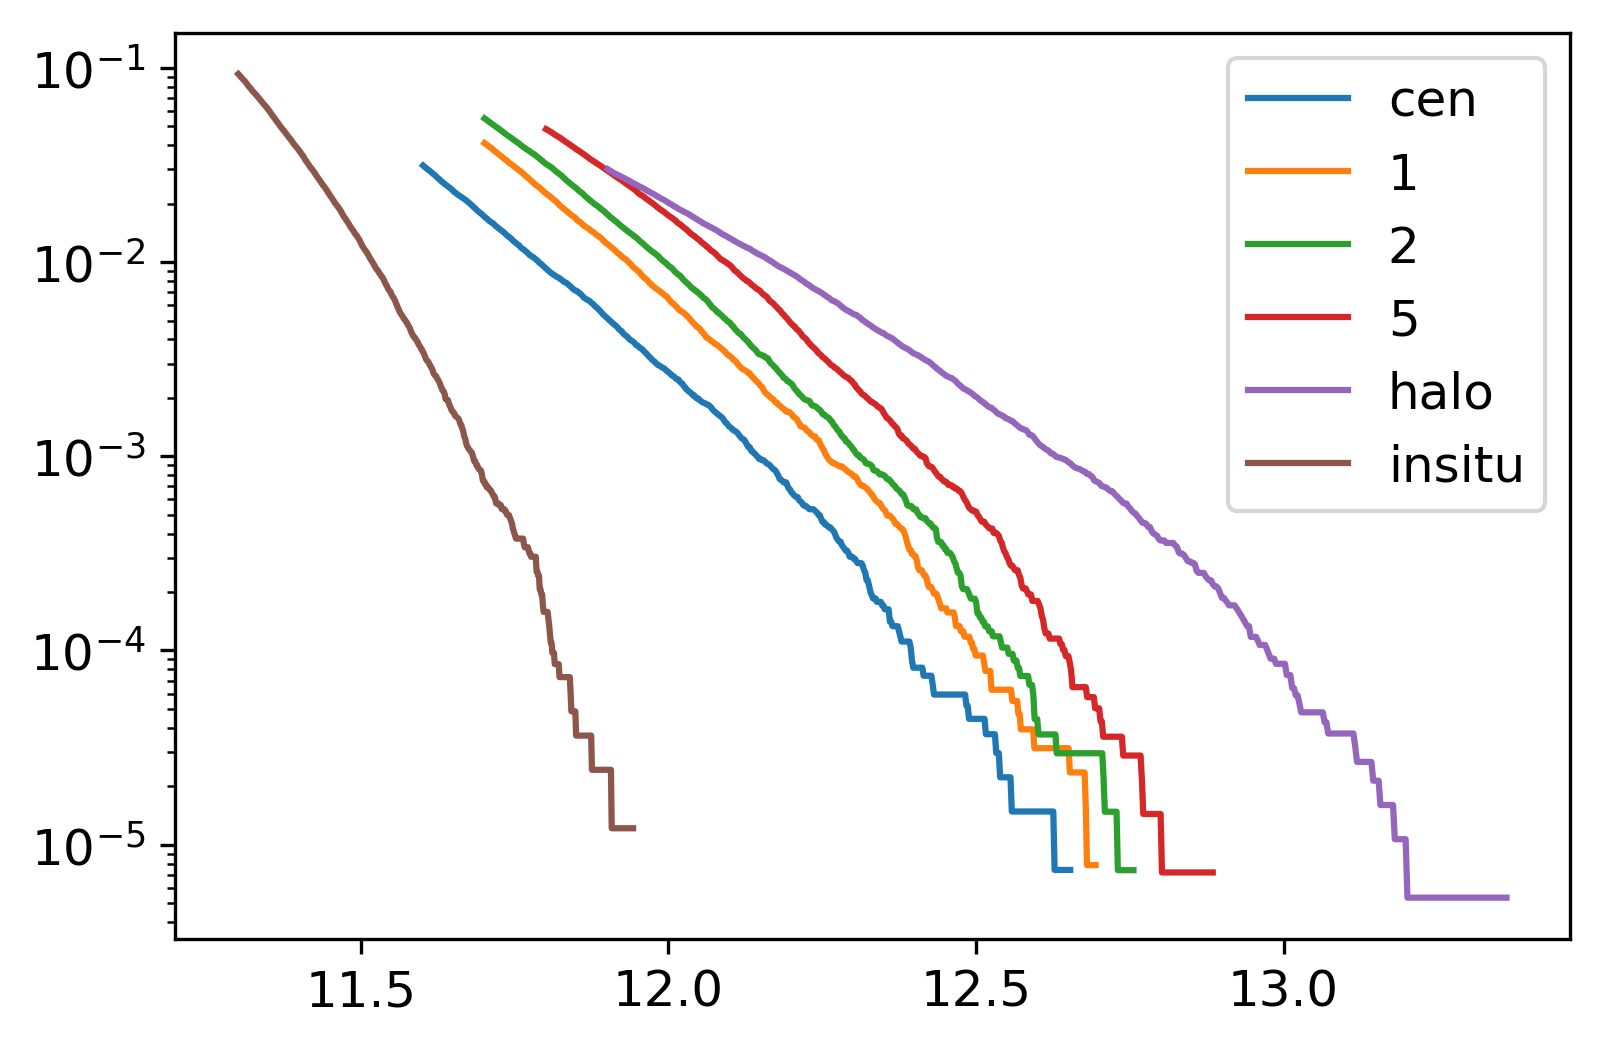

In [141]:
_, ax = plt.subplots()
for key in data_stellar_cut.keys():
    smf_data = data_stellar_cut[key]["smf"]
    ax.plot(smf_data[0], smf_data[1], label=key)
ax.set_yscale("log")
ax.legend()

### Comparison with HSC etc

In [202]:
hsc_smf_file_m10 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm10_smf_default.fits"
hsc_smf_file_m100 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm100_smf_default.fits"

m10_smf = astropy.io.fits.open(hsc_smf_file_m10)[1].data
m100_smf = astropy.io.fits.open(hsc_smf_file_m100)[1].data

In [ ]:
print(m10_smf.dtype)
print(m10_smf)

Dropped 0 galaxies with mass of 0
Dropped 0 galaxies with mass of 0
Dropped 4 galaxies with mass of 0


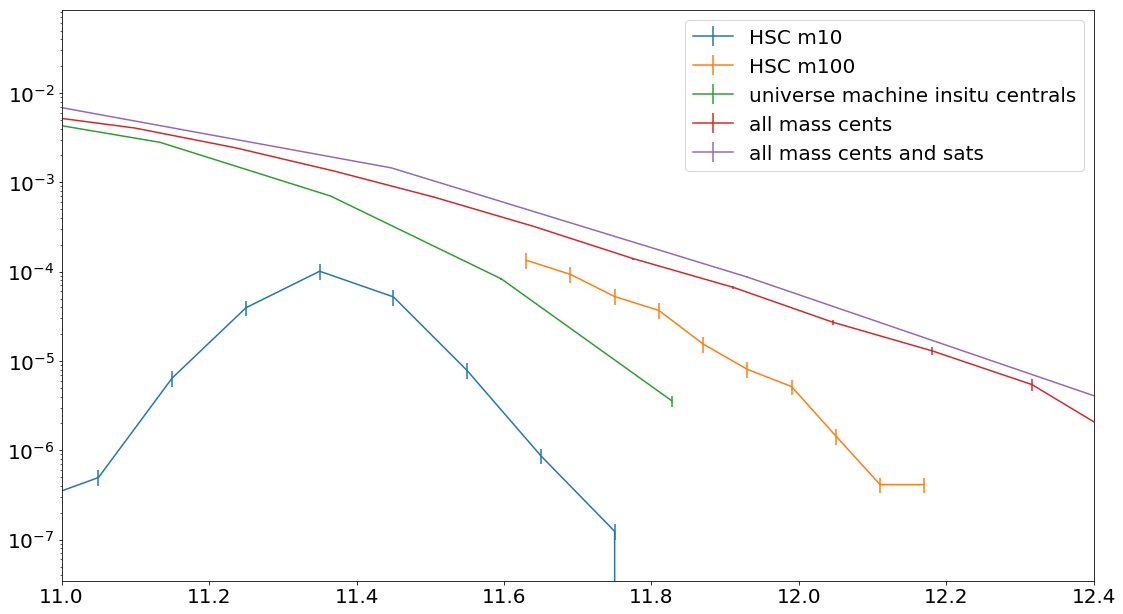

In [210]:
def plot_sim_smf(stellar_masses, ax, label):

    nonzero_stellar_masses = np.log10(stellar_masses[stellar_masses != 0])
    print("Dropped {} galaxies with mass of 0".format(len(stellar_masses) - len(nonzero_stellar_masses)))

    sim_volume = 400**3 # https://redwoodforest.slack.com/archives/C5W6EQCAU/p1513187949000425 SMDPL
    num_bins = 30
    x, y, err = smf.compute_smf(
        nonzero_stellar_masses, sim_volume, num_bins, 
        np.min(nonzero_stellar_masses), np.max(nonzero_stellar_masses),
    )
    ax.errorbar(x, y, yerr = err, label=label)


fig, ax = plt.subplots()
ax.errorbar(m10_smf["logm_mean"], m10_smf["smf"], yerr = m10_smf["smf_err"], label="HSC m10")
ax.errorbar(m100_smf["logm_mean"], m100_smf["smf"], yerr = m100_smf["smf_err"], label="HSC m100")
plot_sim_smf(centrals["sm"], ax, "universe machine insitu centrals")
plot_sim_smf(centrals["sm"] + centrals["icl"], ax, "all mass cents")
plot_sim_smf(np.append(centrals["sm"] + centrals["icl"], satellites["sm"] + satellites["icl"]), ax, "all mass cents and sats")
ax.legend()
ax.set(
    yscale="log",
    xlim=[11, 12.4],
)
fig.set_size_inches(18.5, 10.5)

# Richness as an estimator

What about richness? Does that have a relation with scatter at fixed halo mass

## Sanity check RMF

In [146]:
fits.density_at_richness(data_stellar_cut, "cen", fits.richness_at_density(data_stellar_cut, "cen", 2e-4))

0.00019187769396551723

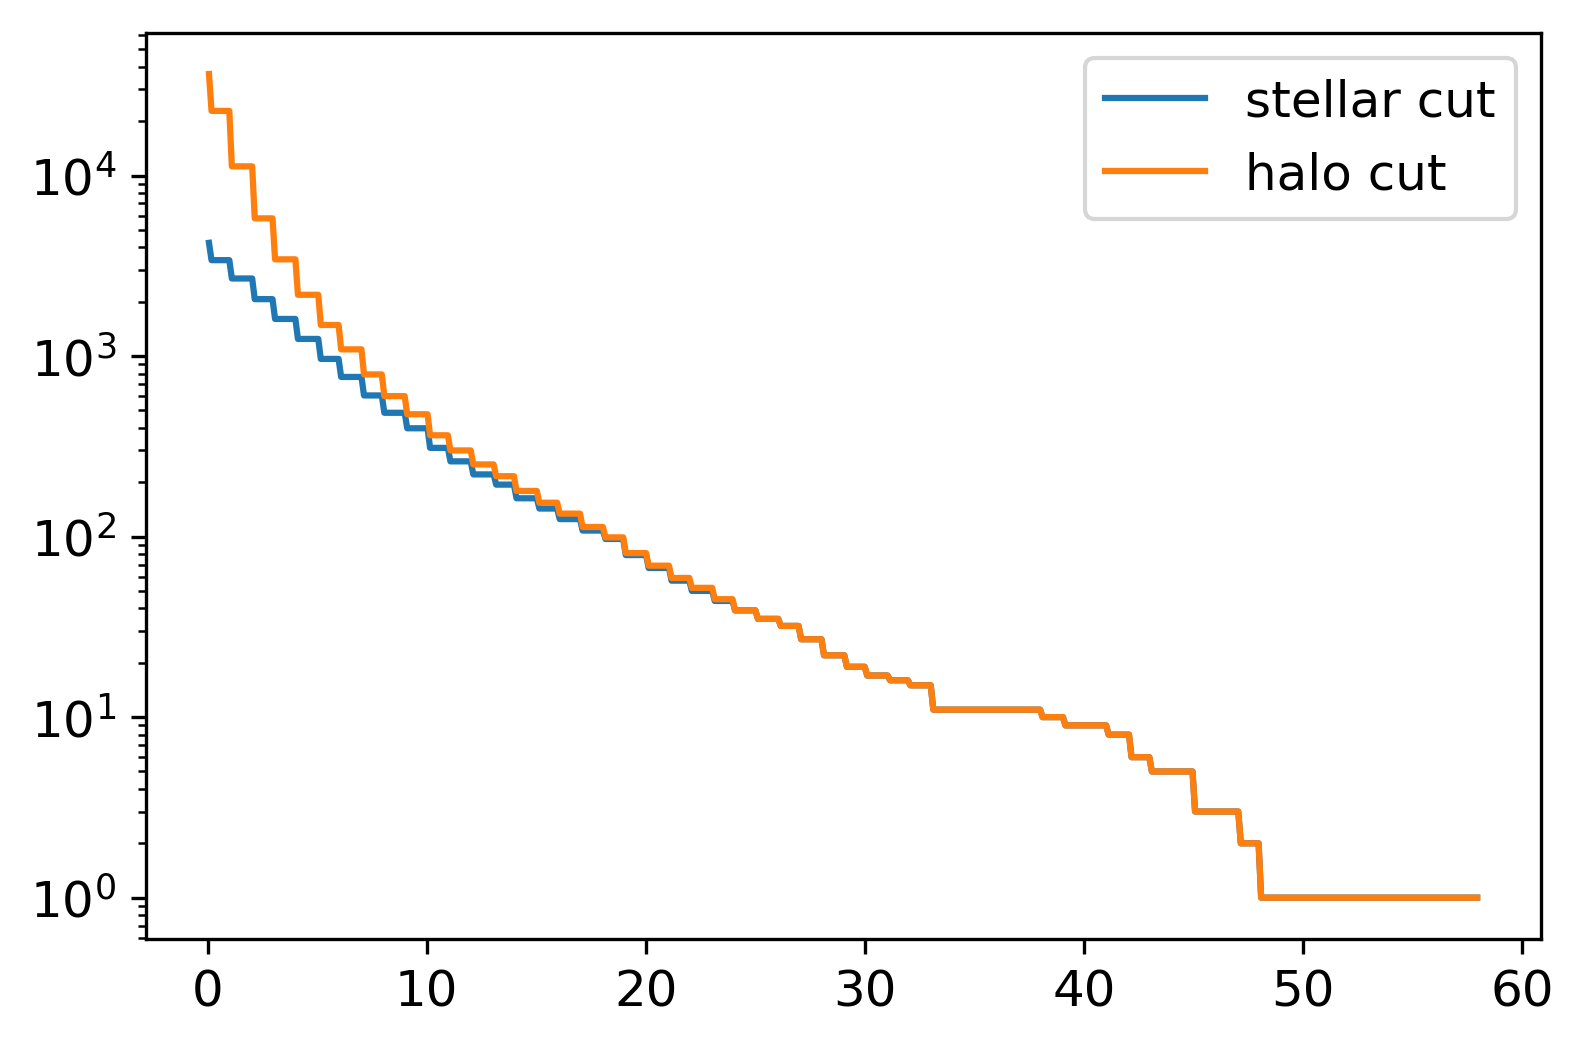

In [35]:
#p.scatter.in_richness_at_fixed_hm(data_halo_cut)
#p.scatter.in_hm_at_fixed_richness_number_density(data_stellar_cut)

_, ax = plt.subplots()
rmf_data = data_stellar_cut["cen"]["rmf"]
ax.plot(rmf_data[0], rmf_data[1], label="stellar cut")
rmf_data = data_halo_cut["cen"]["rmf"]
ax.plot(rmf_data[0], rmf_data[1], label="halo cut")
ax.set_yscale("log")
ax.legend()

## Richness plots


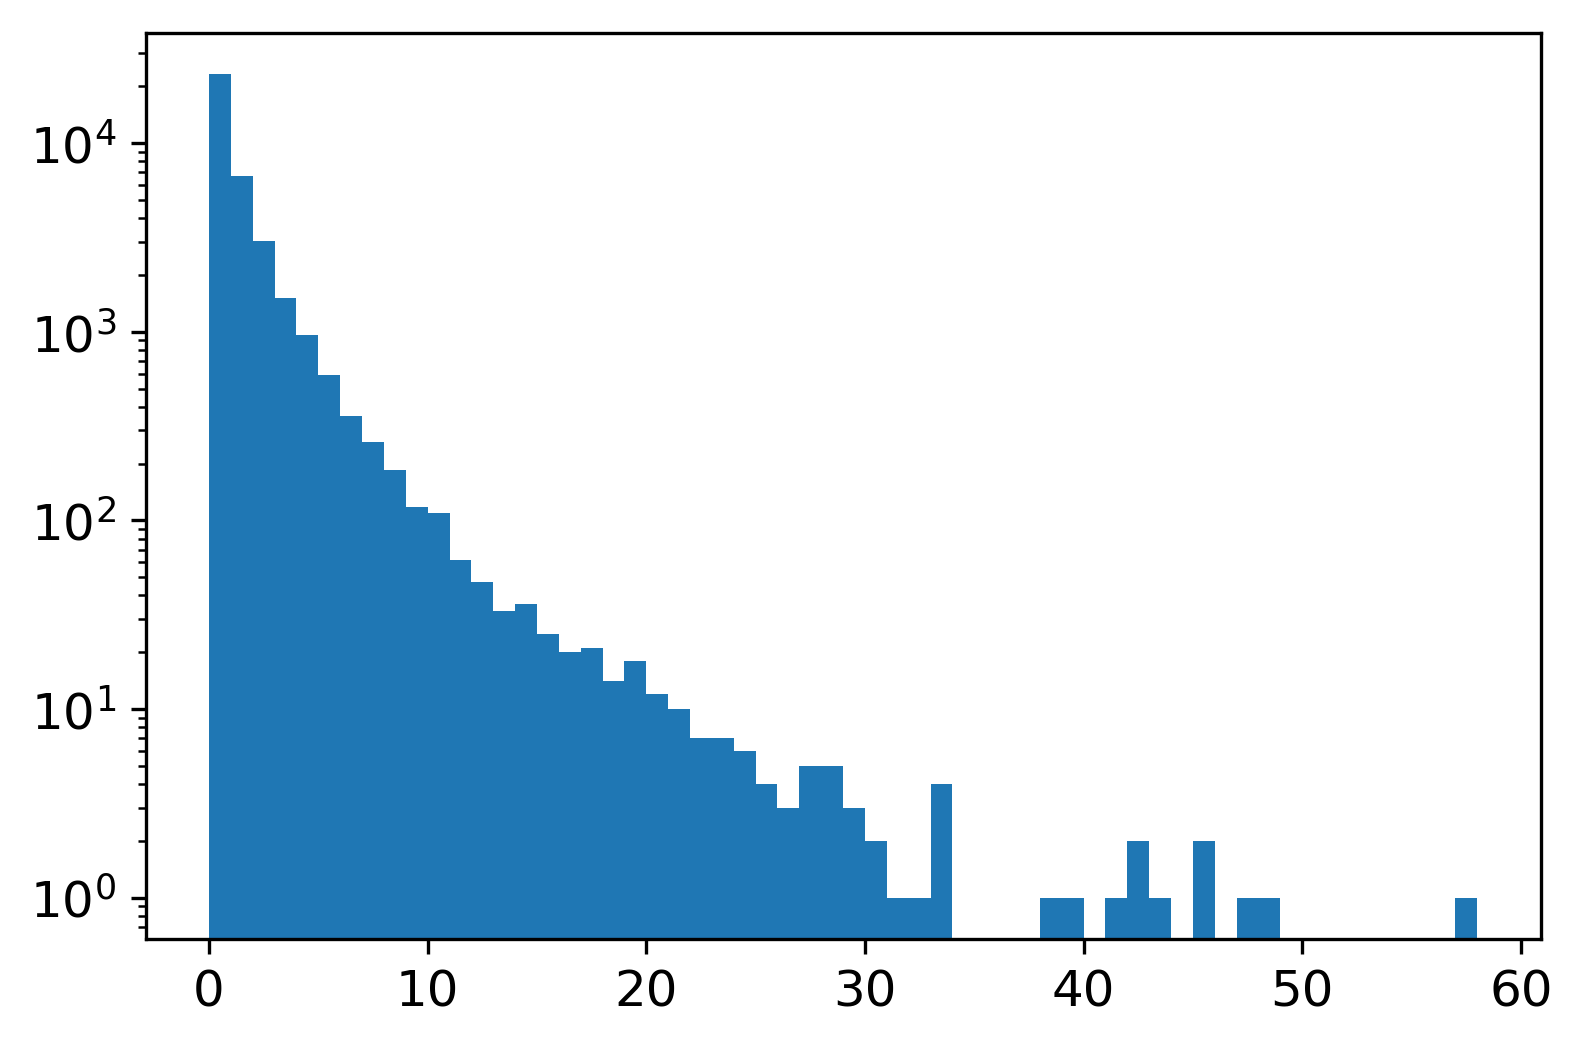

In [32]:
r = data_stellar_cut["cen"]["richness"]

ex = r[r["richness"] == 2]
#plt.hist(r, bins=int(np.max(r["richness"])))
#plt.yscale("log")
plt.hist(np.log10(ex["m"])

[ 0  1  2  3  5  7  9 11 14 18 22 26 30 35 41]
Warning - 4 items in bin 14
[23266, 6716, 3041, 1513, 1553, 618, 303, 219, 94, 73, 36, 18, 12, 4, 6]


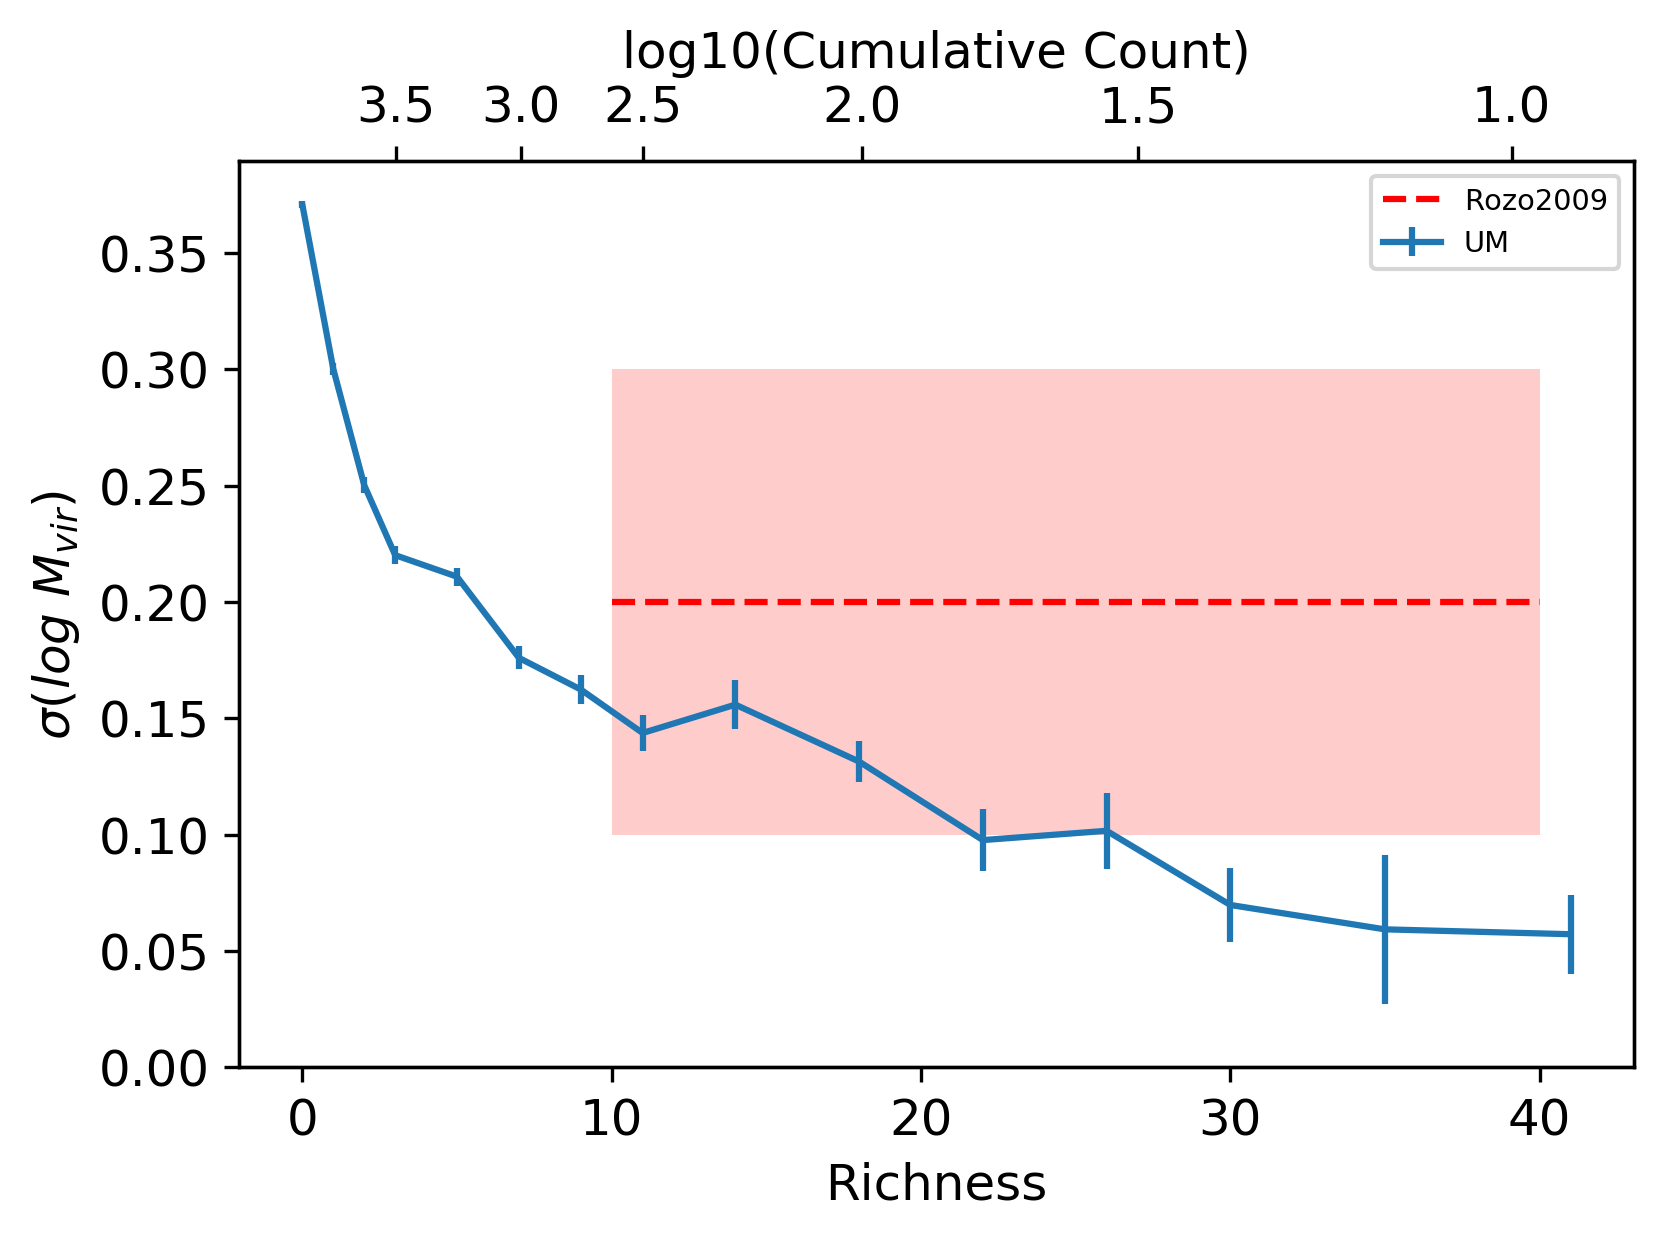

In [74]:
ax = p.scatter.in_hm_at_fixed_richness_number_density(data_stellar_cut)

### Old color plots

Out of 36491 clusters, 22803 have a richness > 0


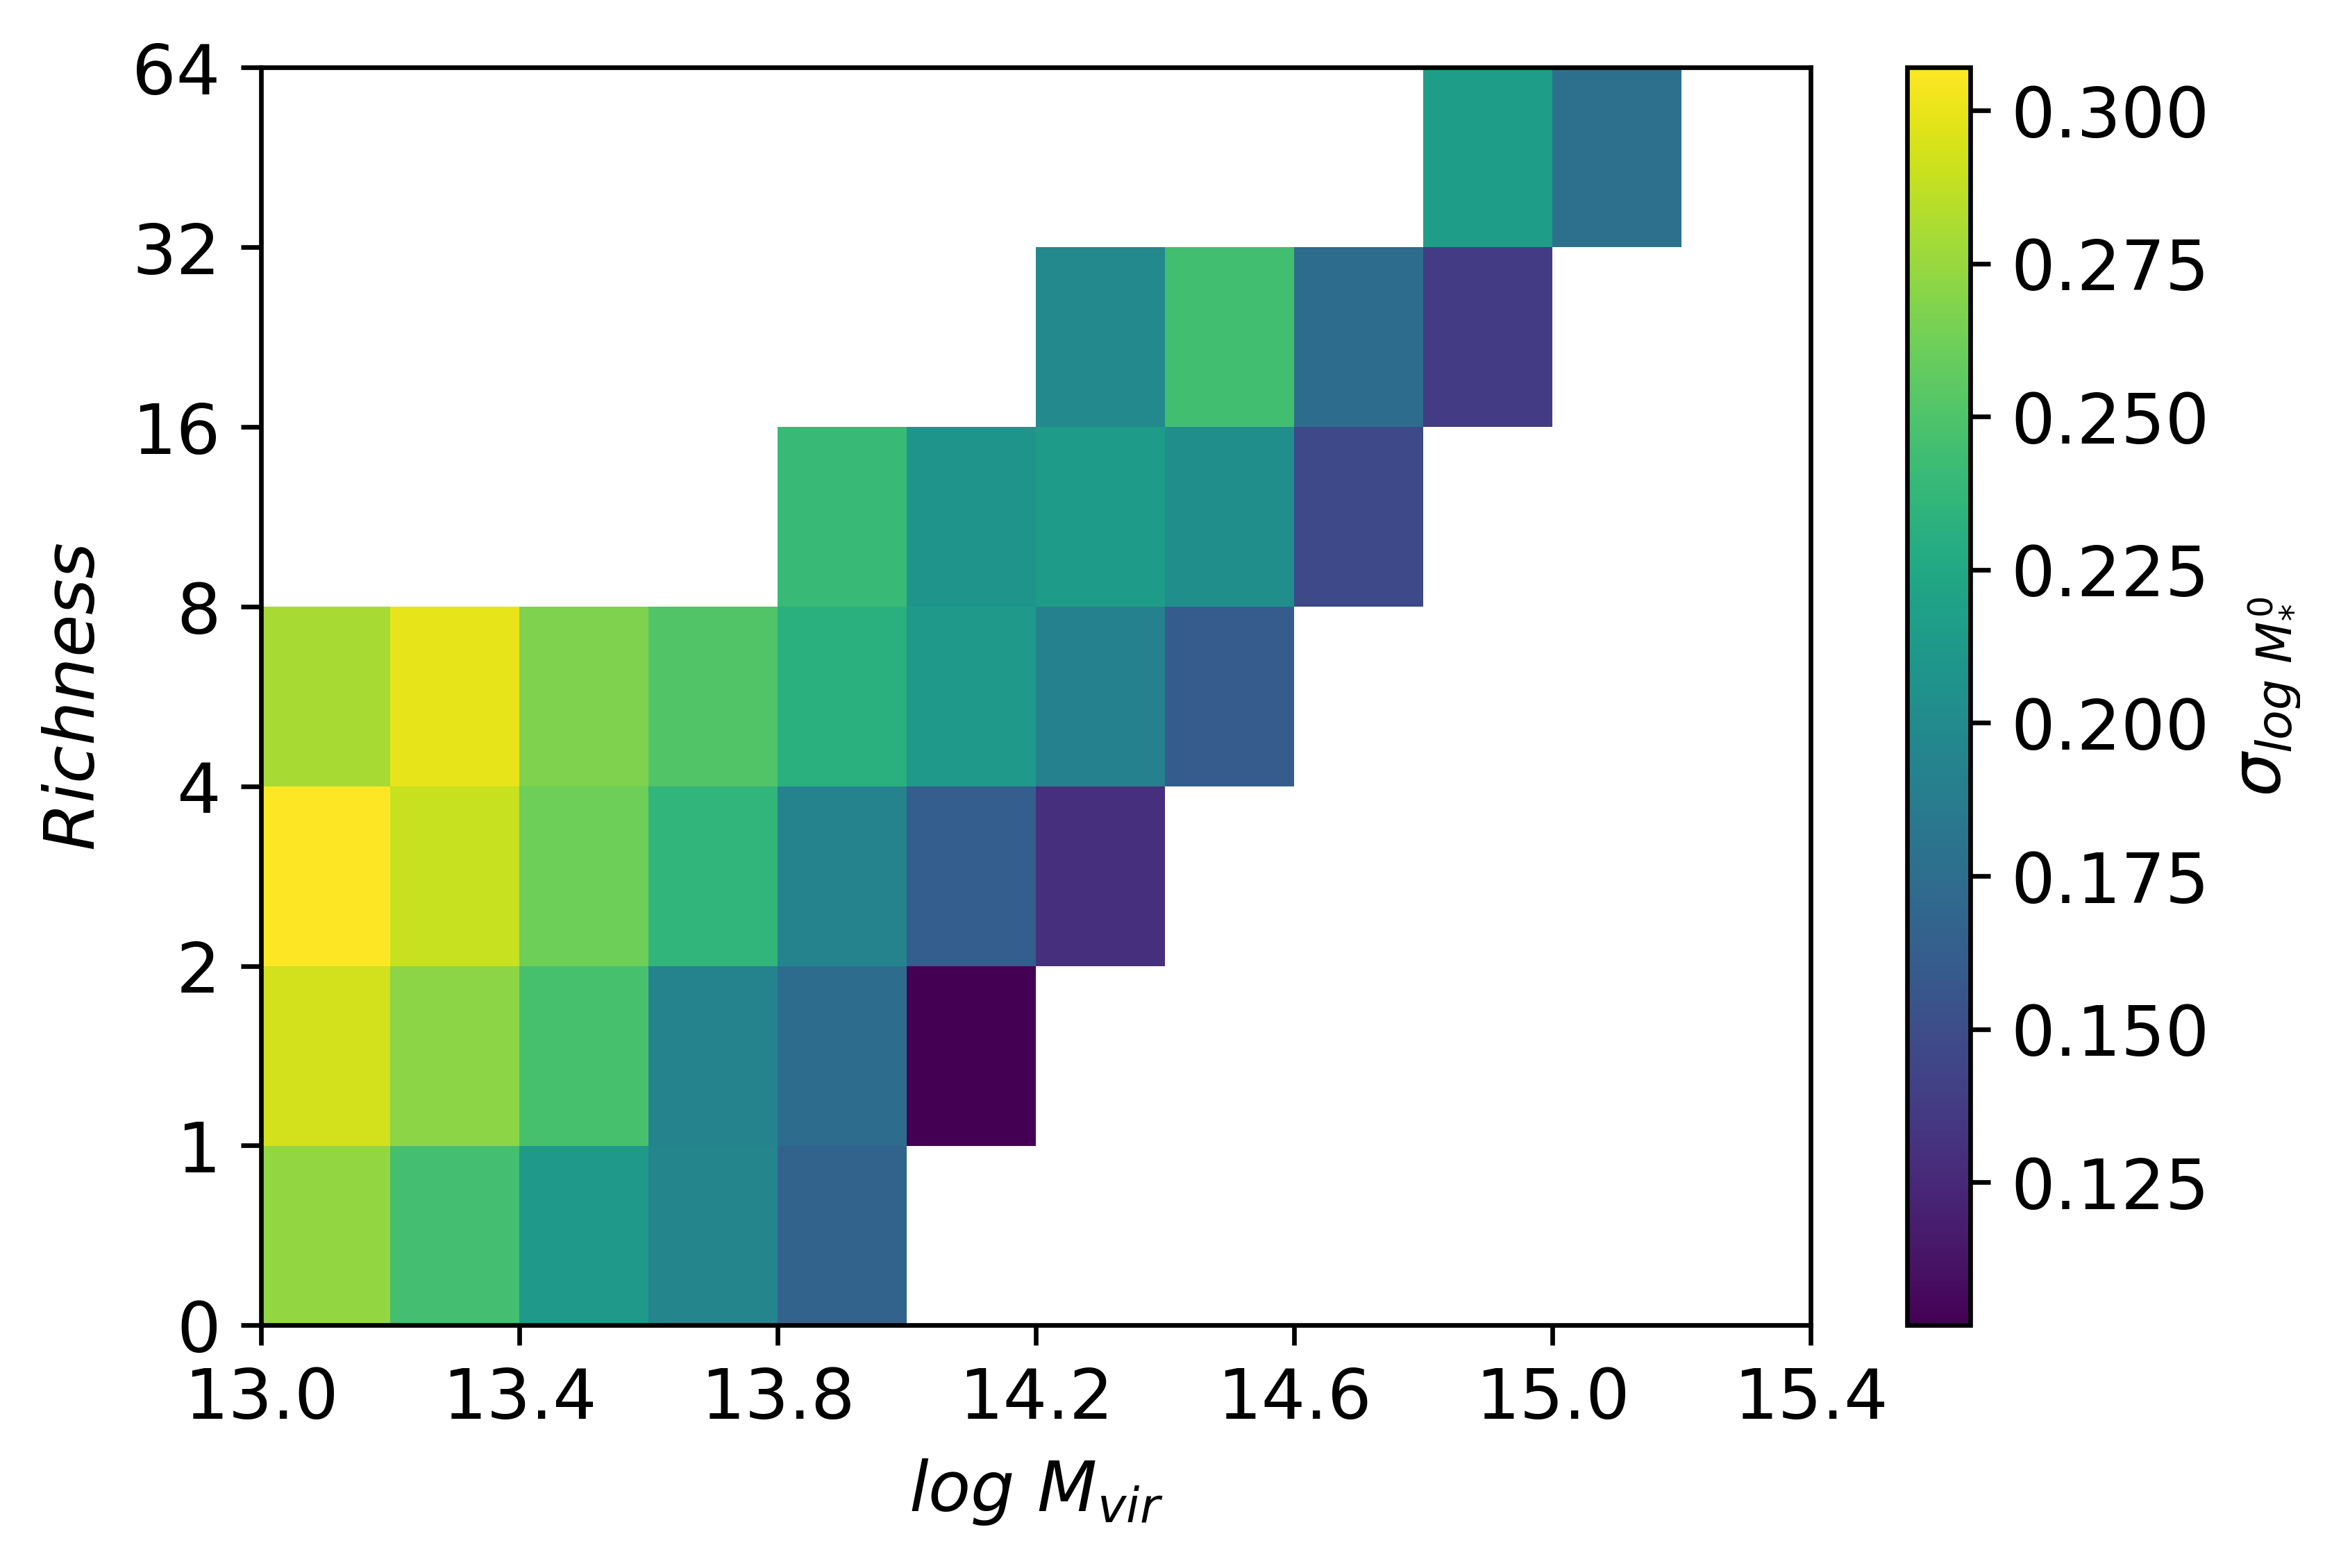

In [108]:
# Only count sats of a large enough size towards richness
minMassForRichness = 10**10.8
richness = cluster_sum.get_richness(centrals_halo_cut, satellites, minMassForRichness)
print("Out of {} clusters, {} have a richness > 0".format(len(richness), np.count_nonzero(richness)))
heatmaps.richness_and_hm_vs_sm_scatter(
    data_halo_cut[0]["data"],
    satellites,
    minMassForRichness,
    data_halo_cut[0]["fit"],
    0,
)

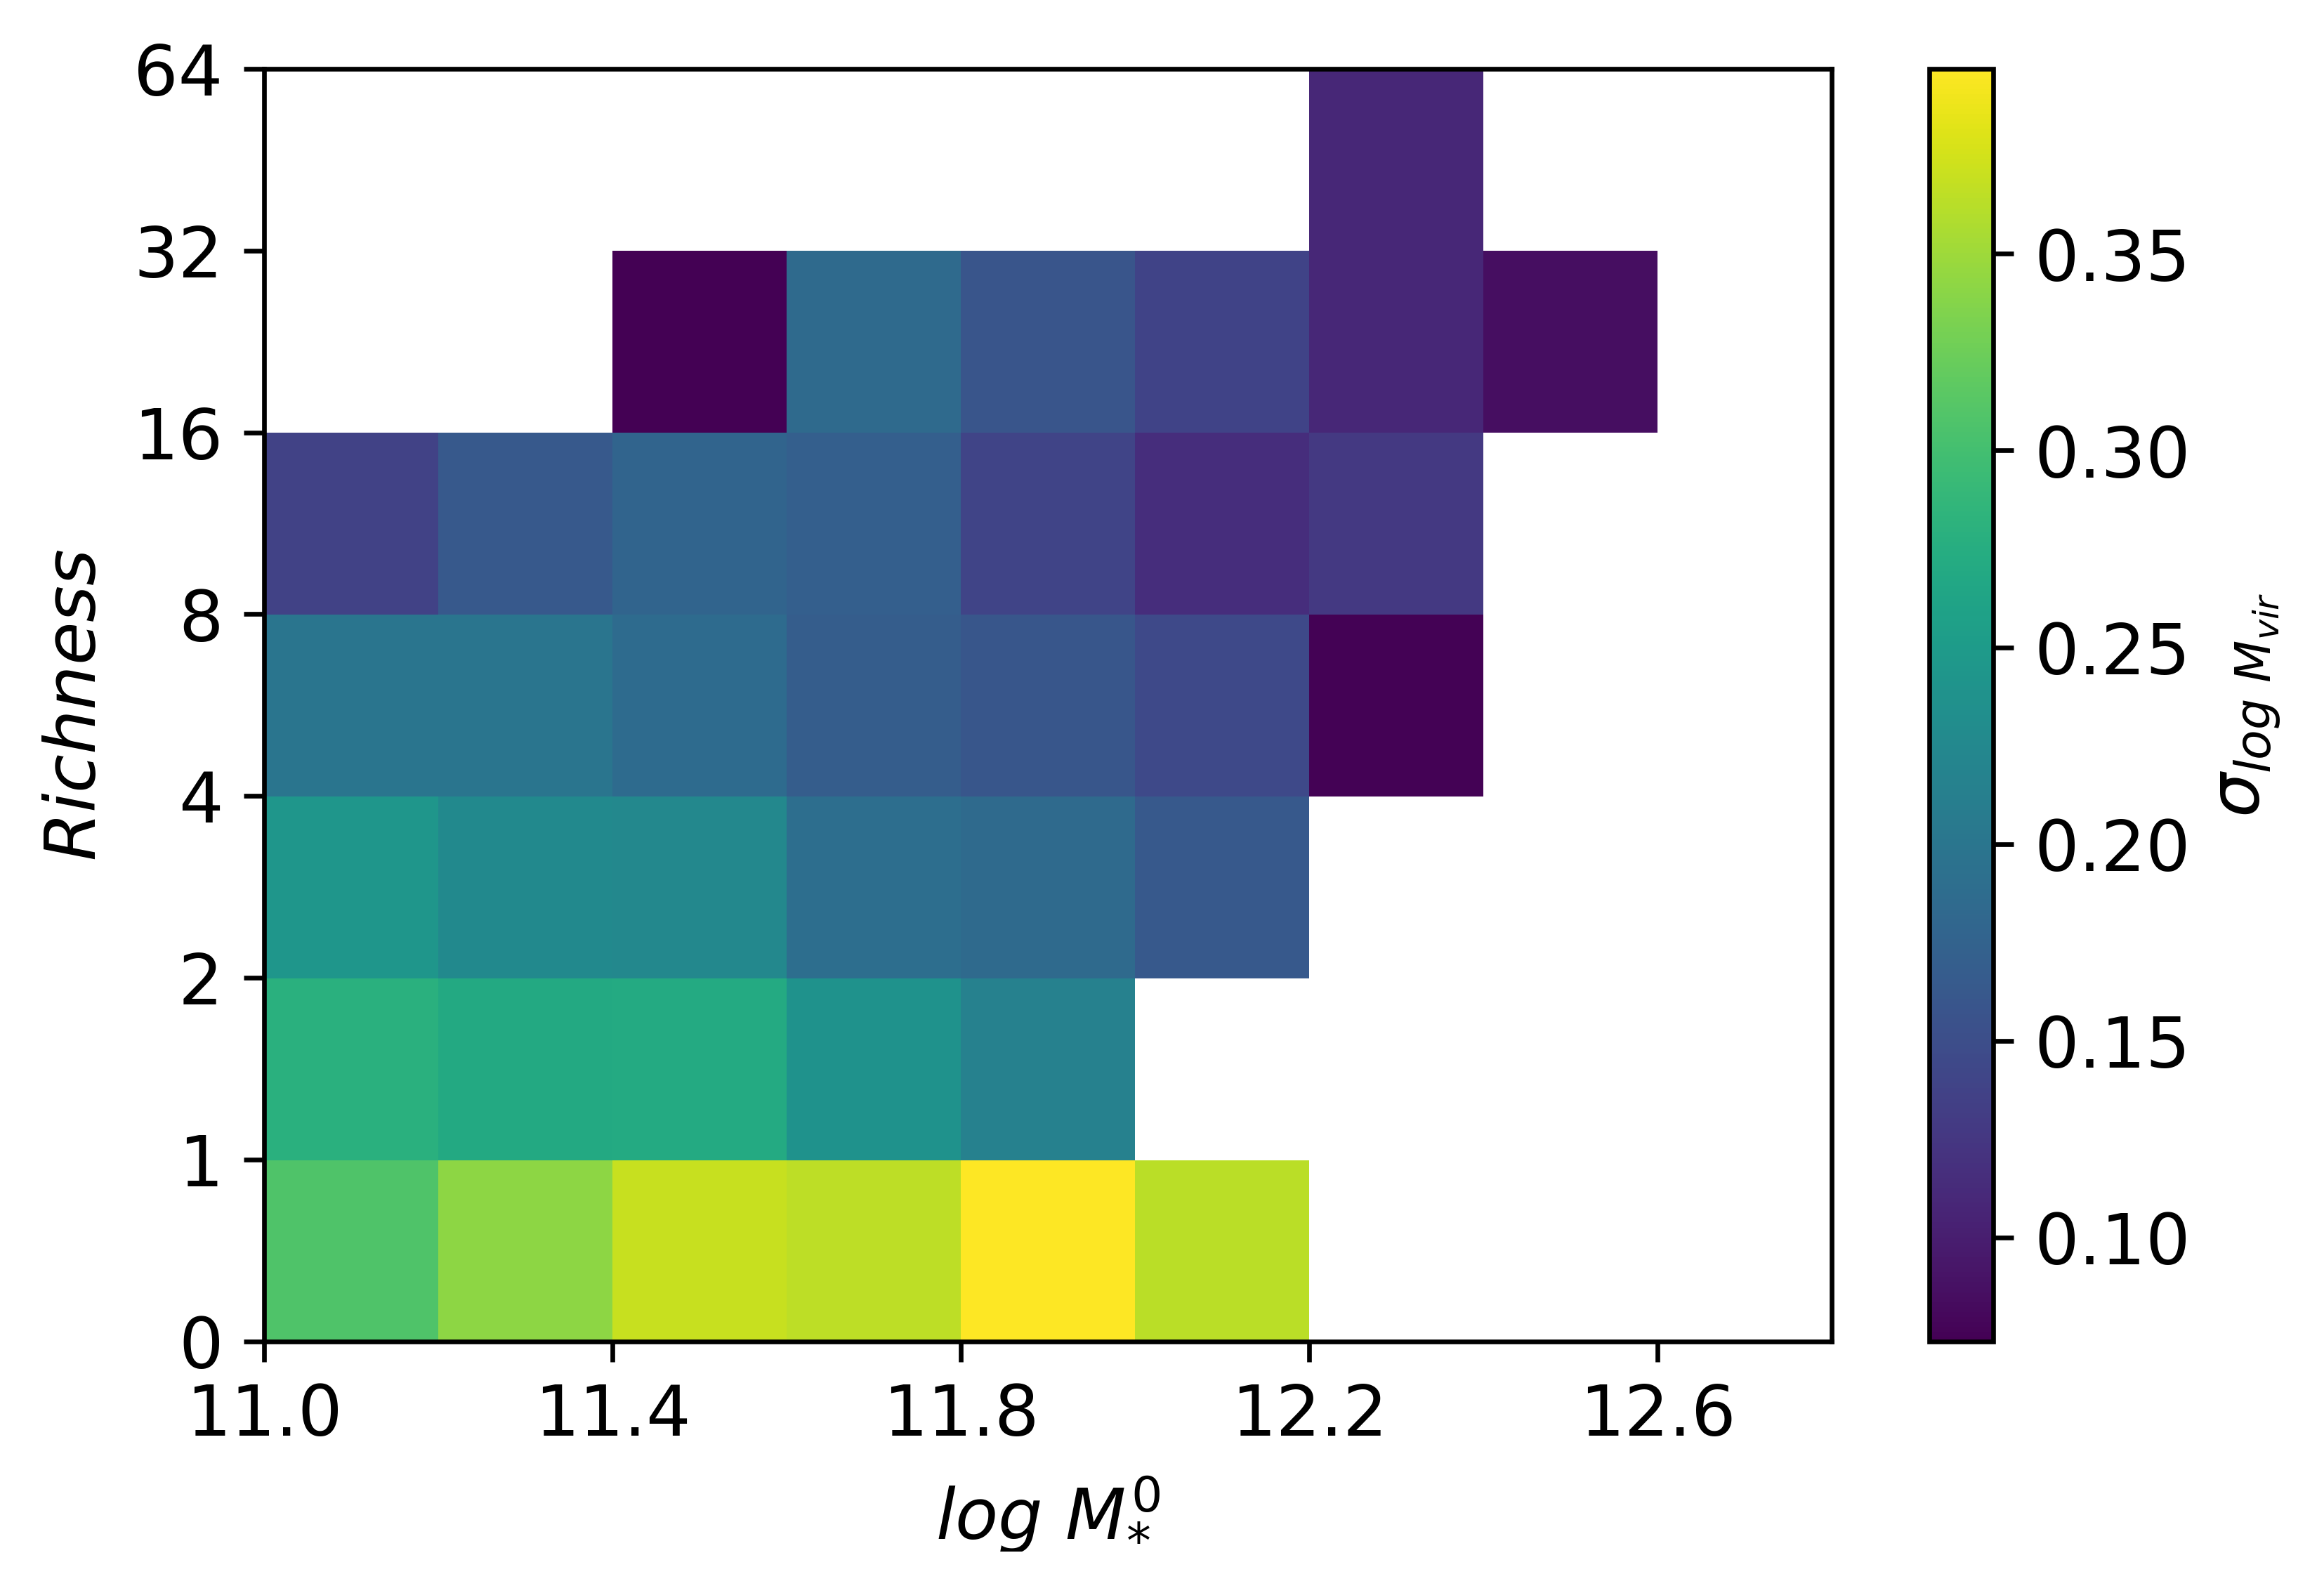

In [109]:
heatmaps.richness_and_sm_vs_hm_scatter(
    data_stellar_cut[0]["data"],
    satellites,
    minMassForRichness,
    data_stellar_cut[0]["fit"],
    0,
)

# What could cause the scatter in the SMHR?

[[ 1.          0.28532719 -0.10461003 -0.19585167 -0.33711034]
 [ 0.28532719  1.         -0.23110553 -0.39260235 -0.6184983 ]
 [-0.10461003 -0.23110553  1.          0.18655801  0.26153502]
 [-0.19585167 -0.39260235  0.18655801  1.          0.6255799 ]
 [-0.33711034 -0.6184983   0.26153502  0.6255799   1.        ]]


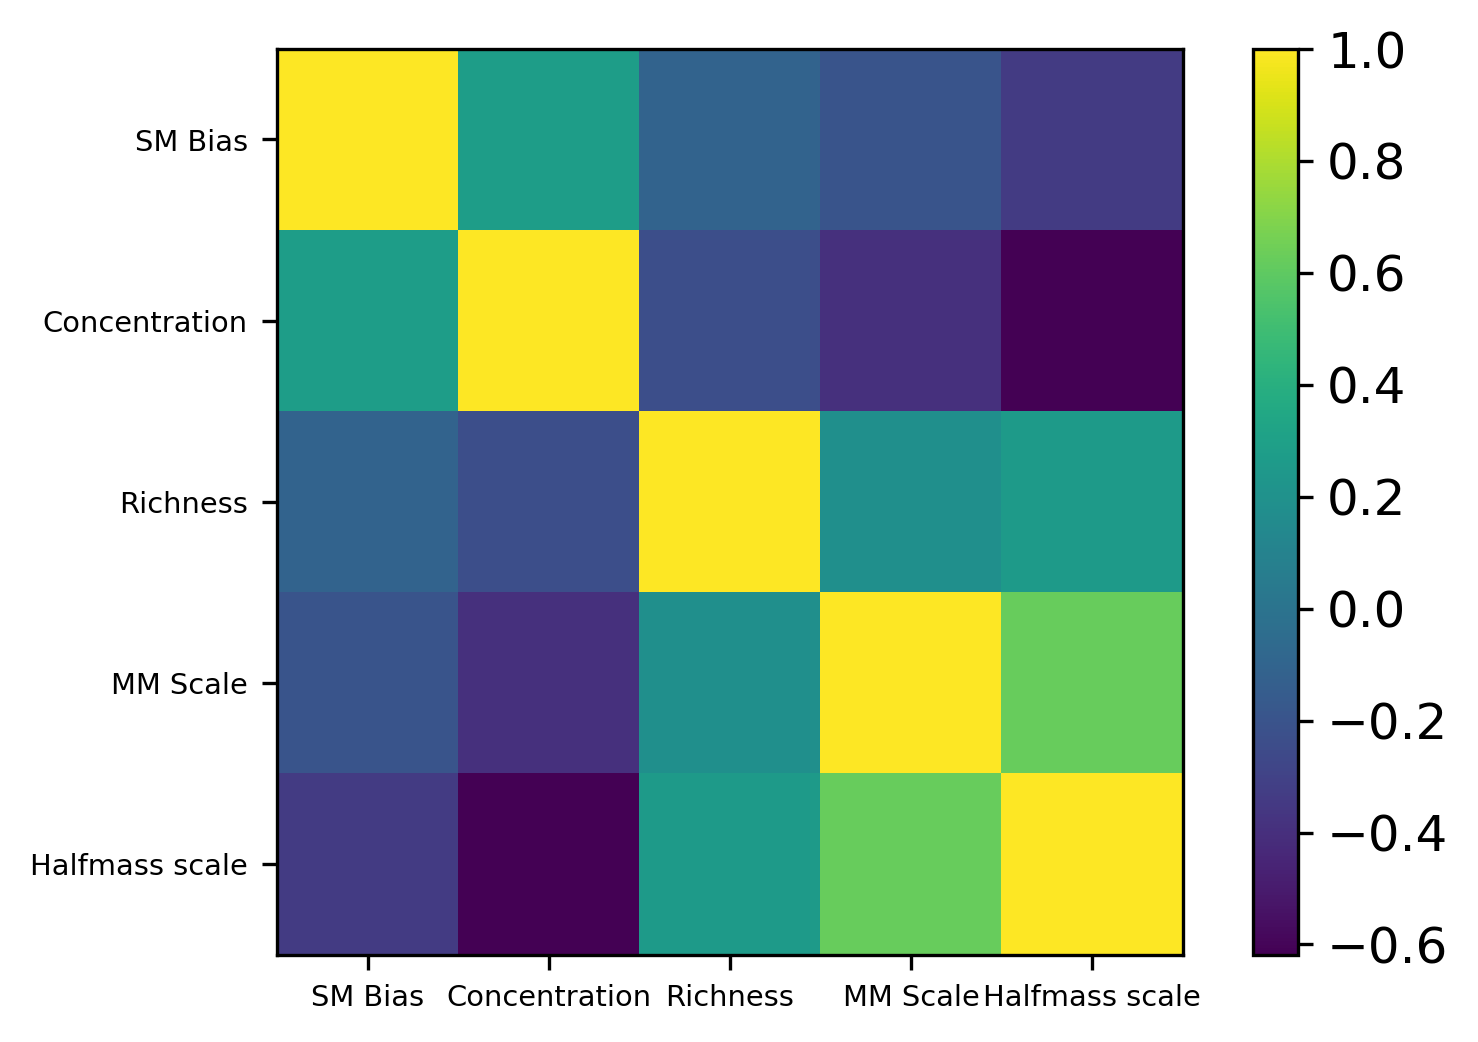

In [88]:
p.physical_correlation_plots.correlation_matrix(data_halo_cut["cen"])

# Concentration - is that correlated with over/undermassive halos

Same as richness but for concentration

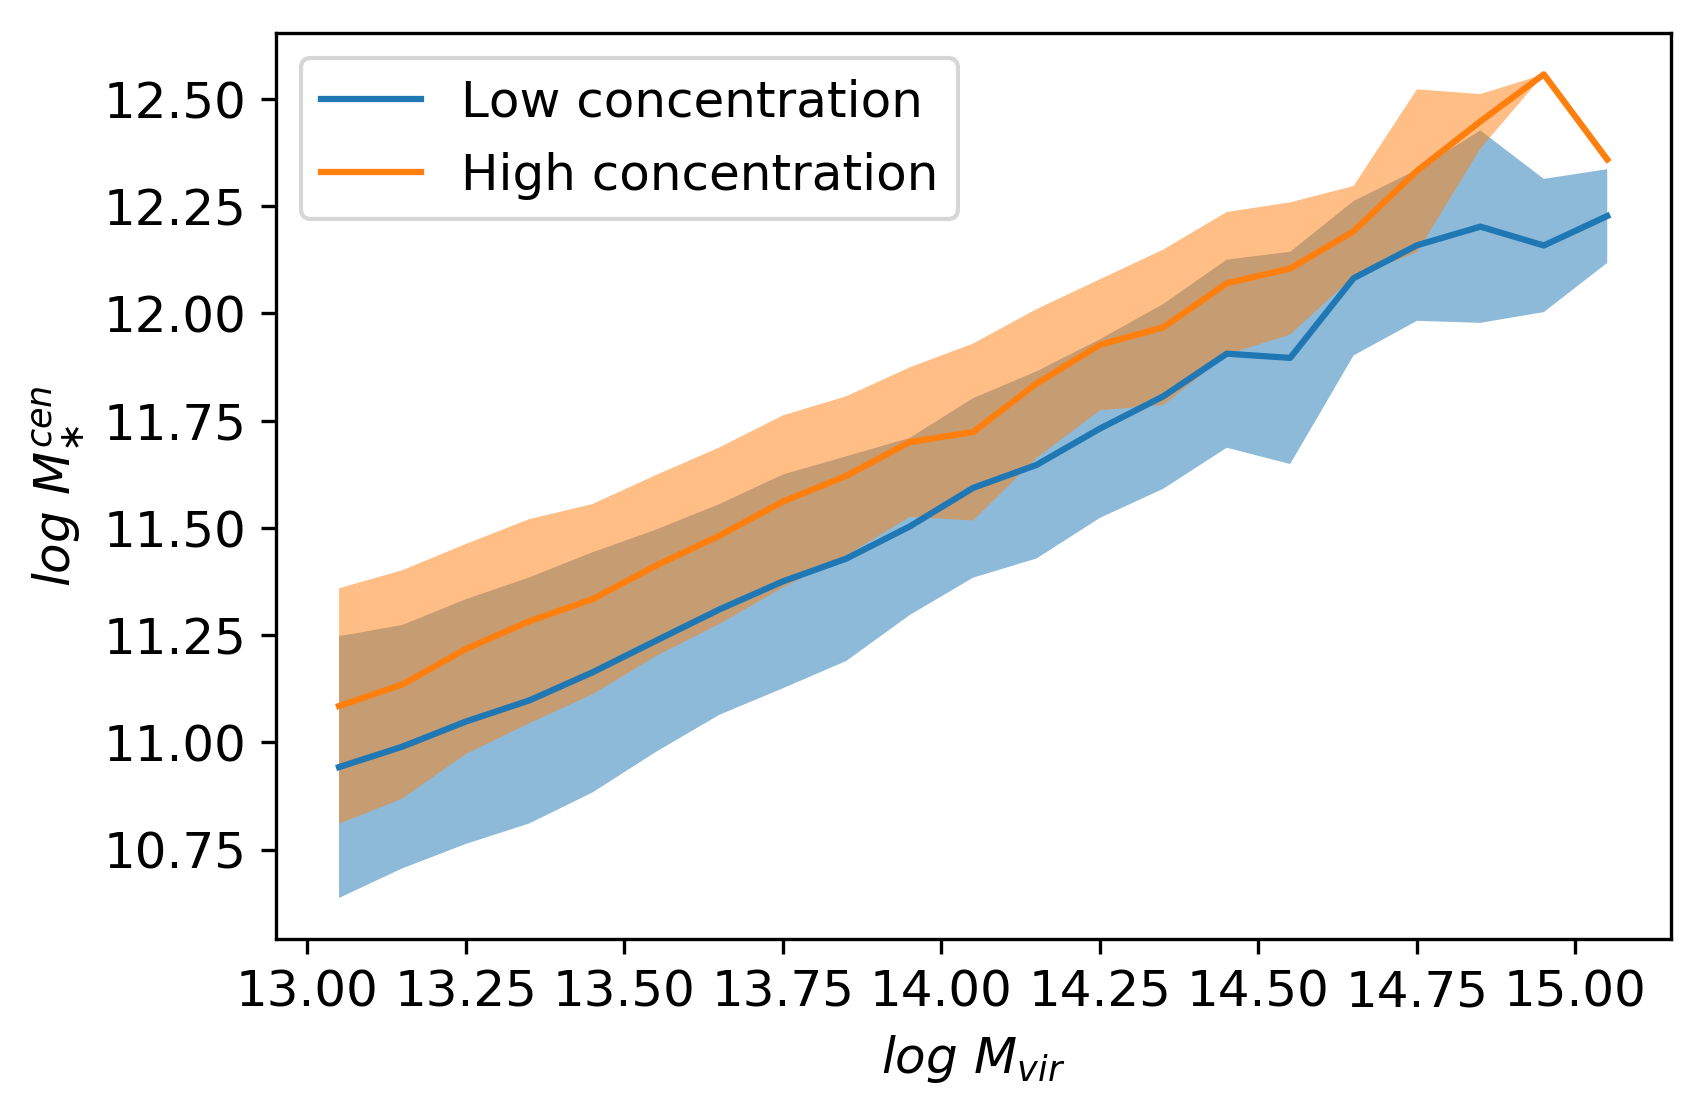

In [106]:
p.physical_correlation_plots.sm_at_fixed_hm_conc_split(data_halo_cut["cen"])

(2, 36491)
[[0.07217593 0.1604215 ]
 [0.1604215  4.37972125]]


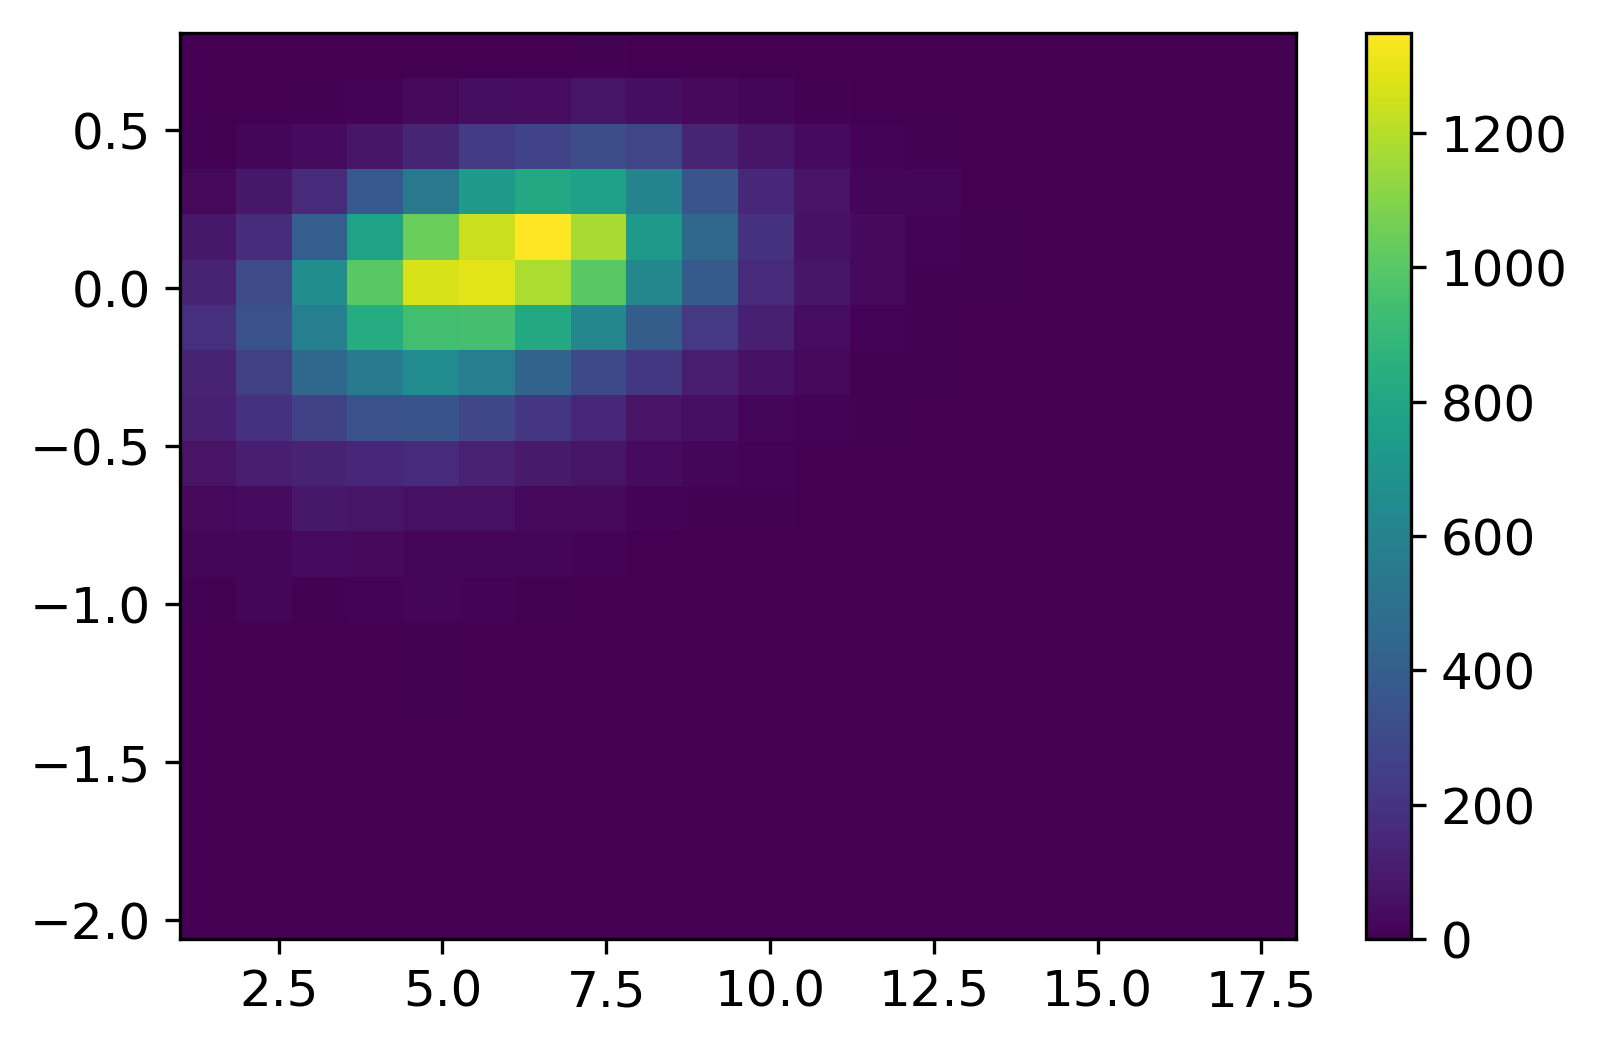

In [48]:
p.physical_correlation_plots.conc_sm_heatmap_at_fixed_hm(data_halo_cut["cen"])

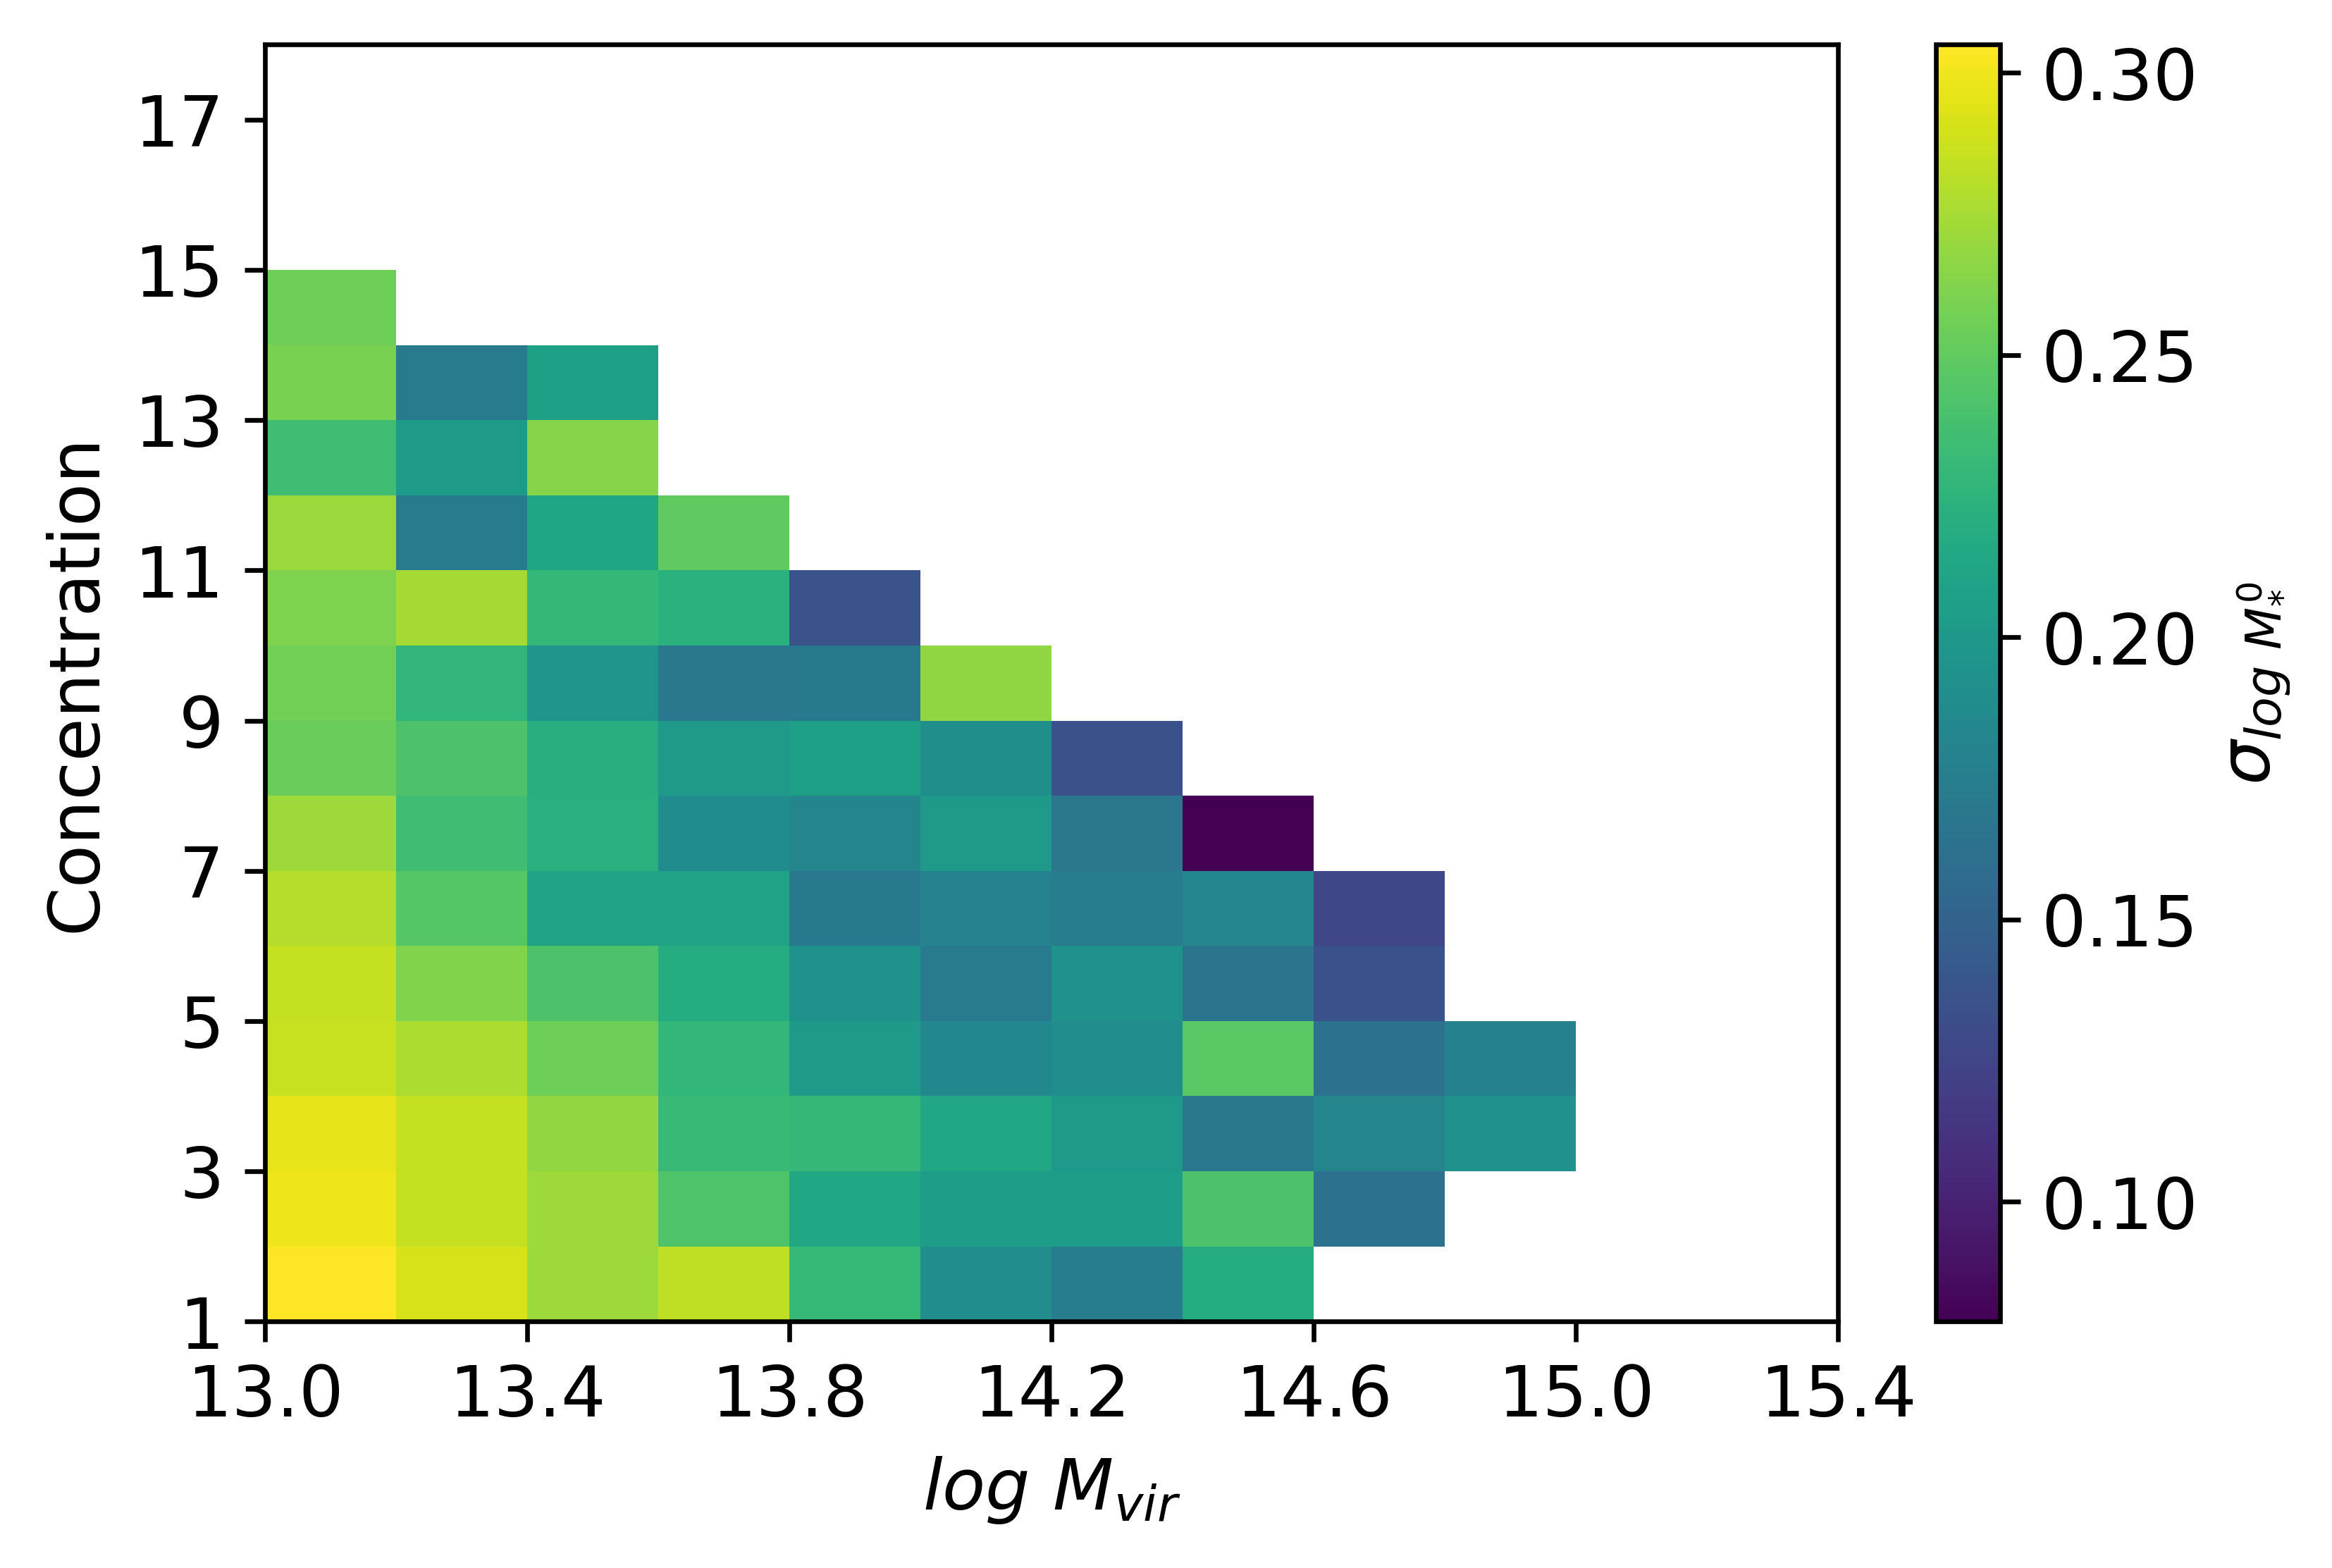

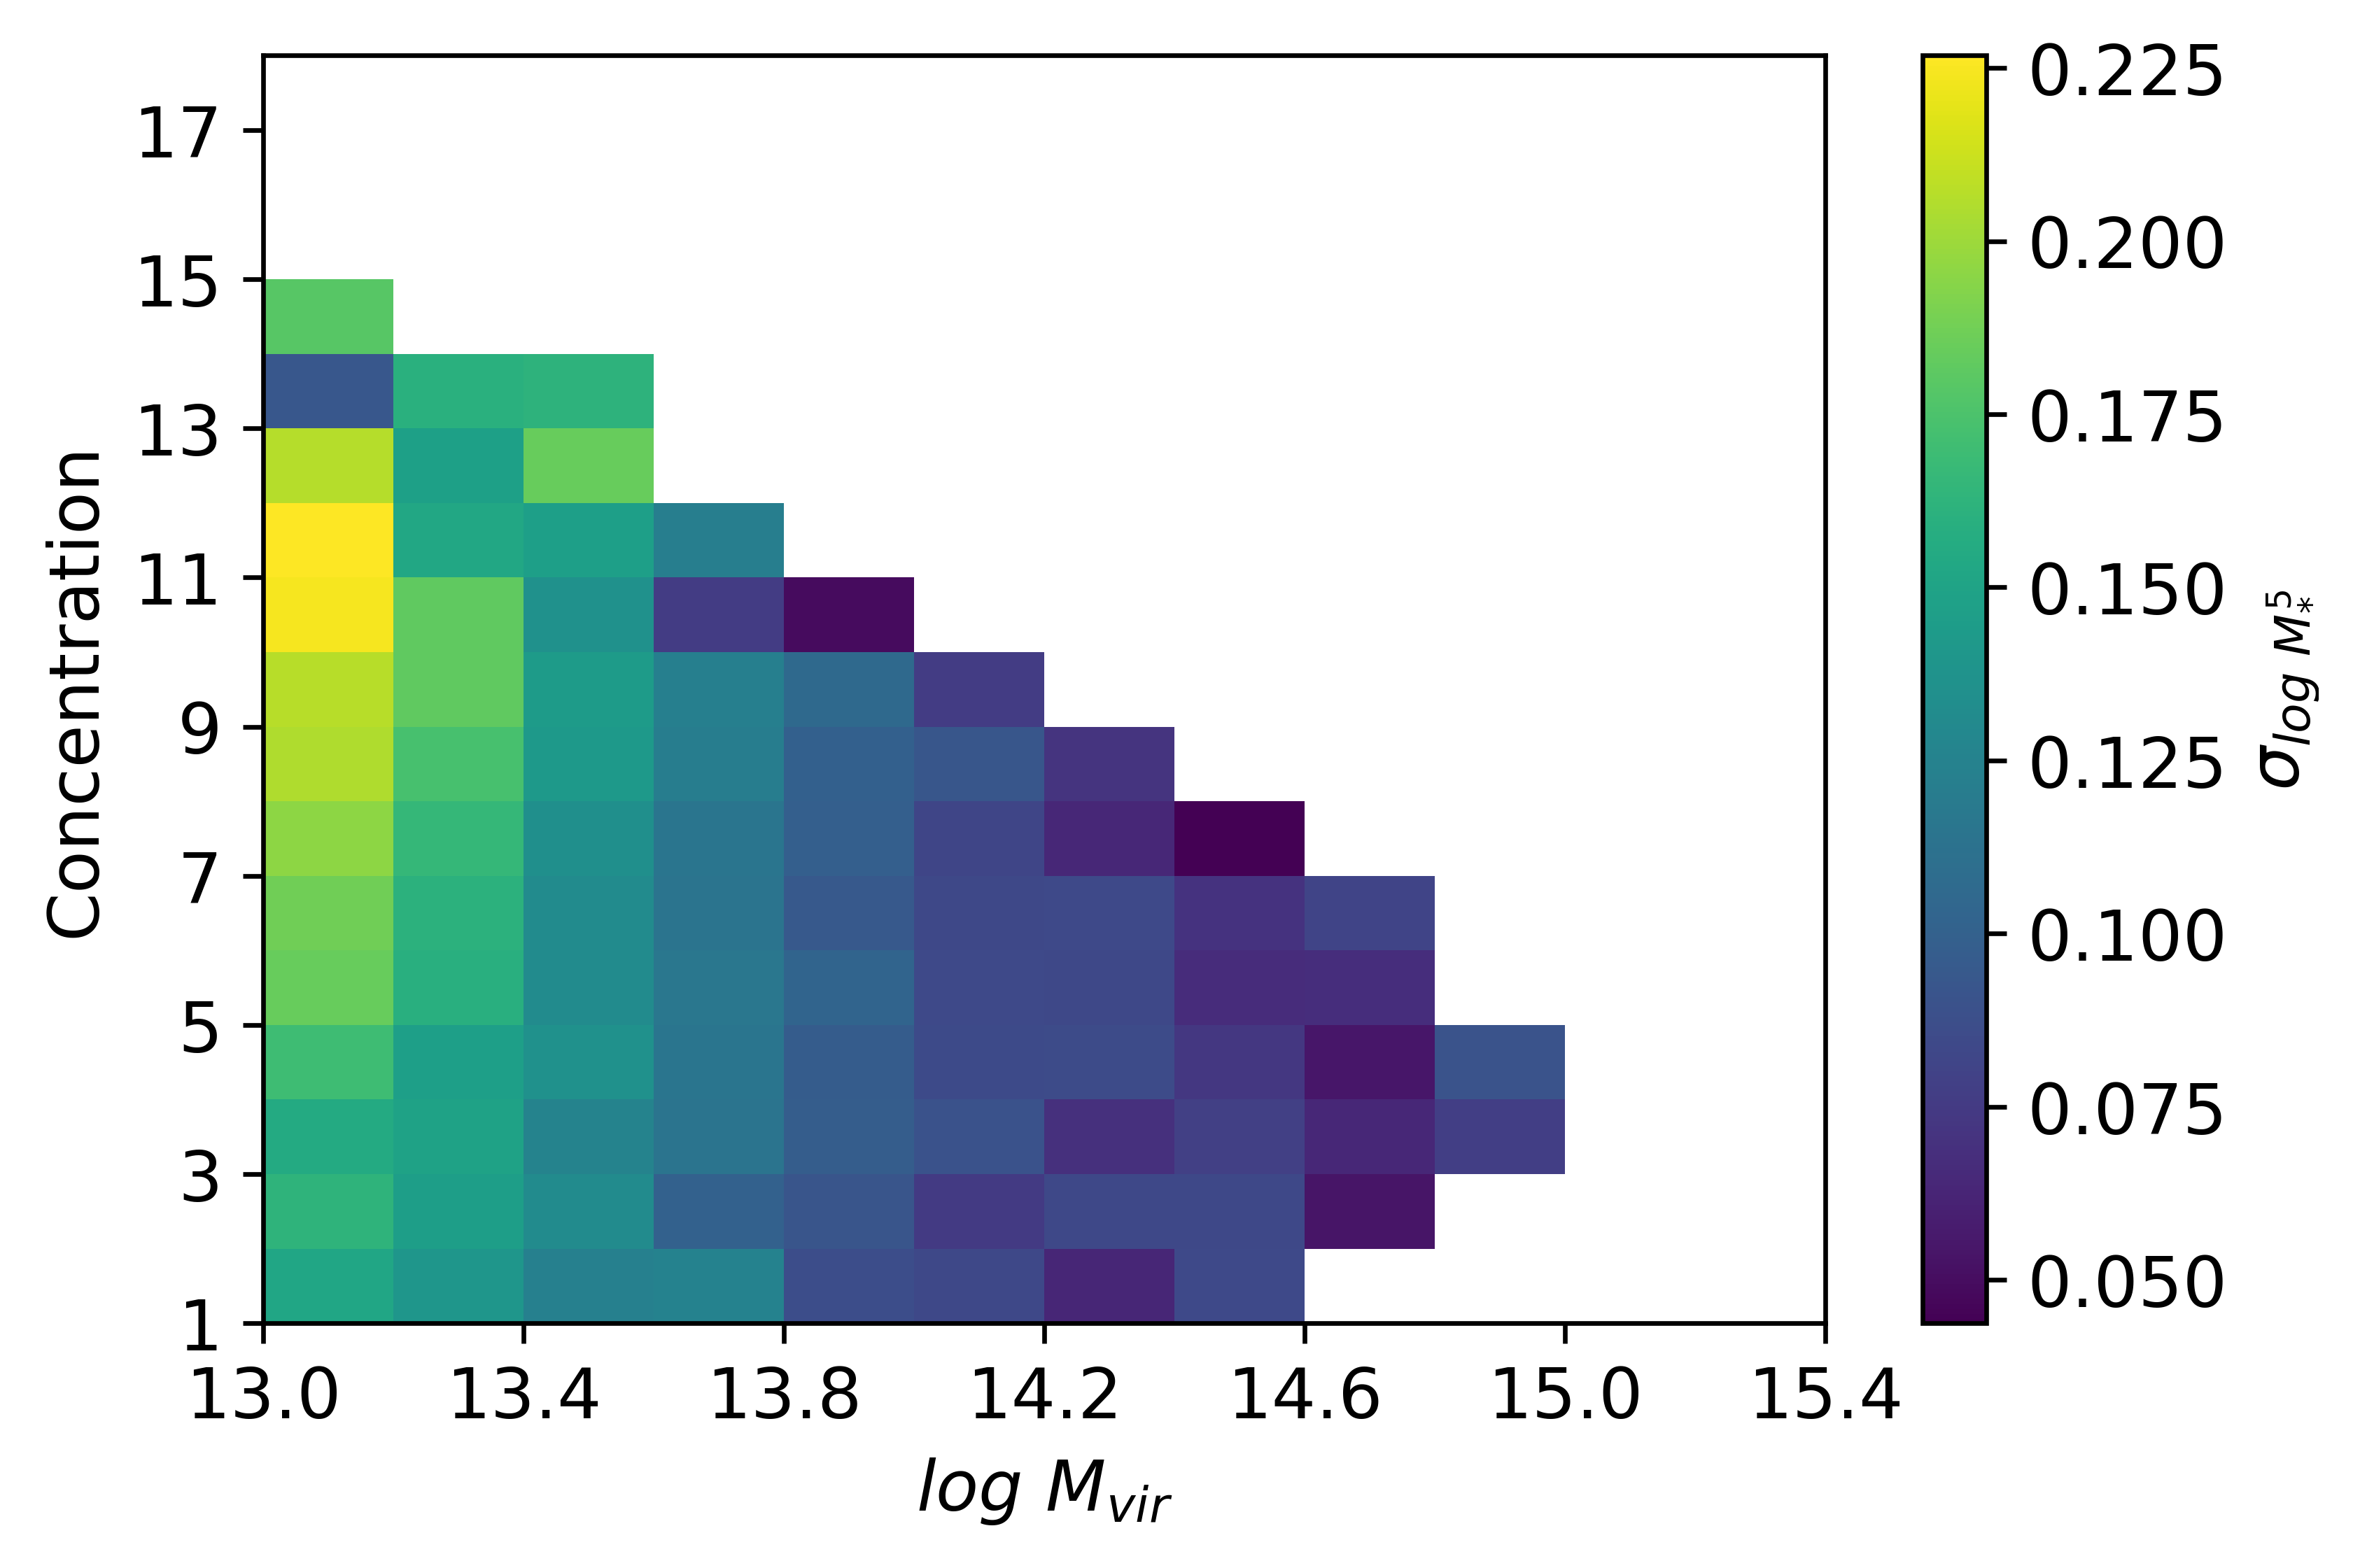

In [106]:
heatmaps.concentration_and_hm_vs_sm_scatter(data_halo_cut[0]["data"], data_halo_cut[0]["fit"], 0)
heatmaps.concentration_and_hm_vs_sm_scatter(data_halo_cut[5]["data"], data_halo_cut[5]["fit"], 5)

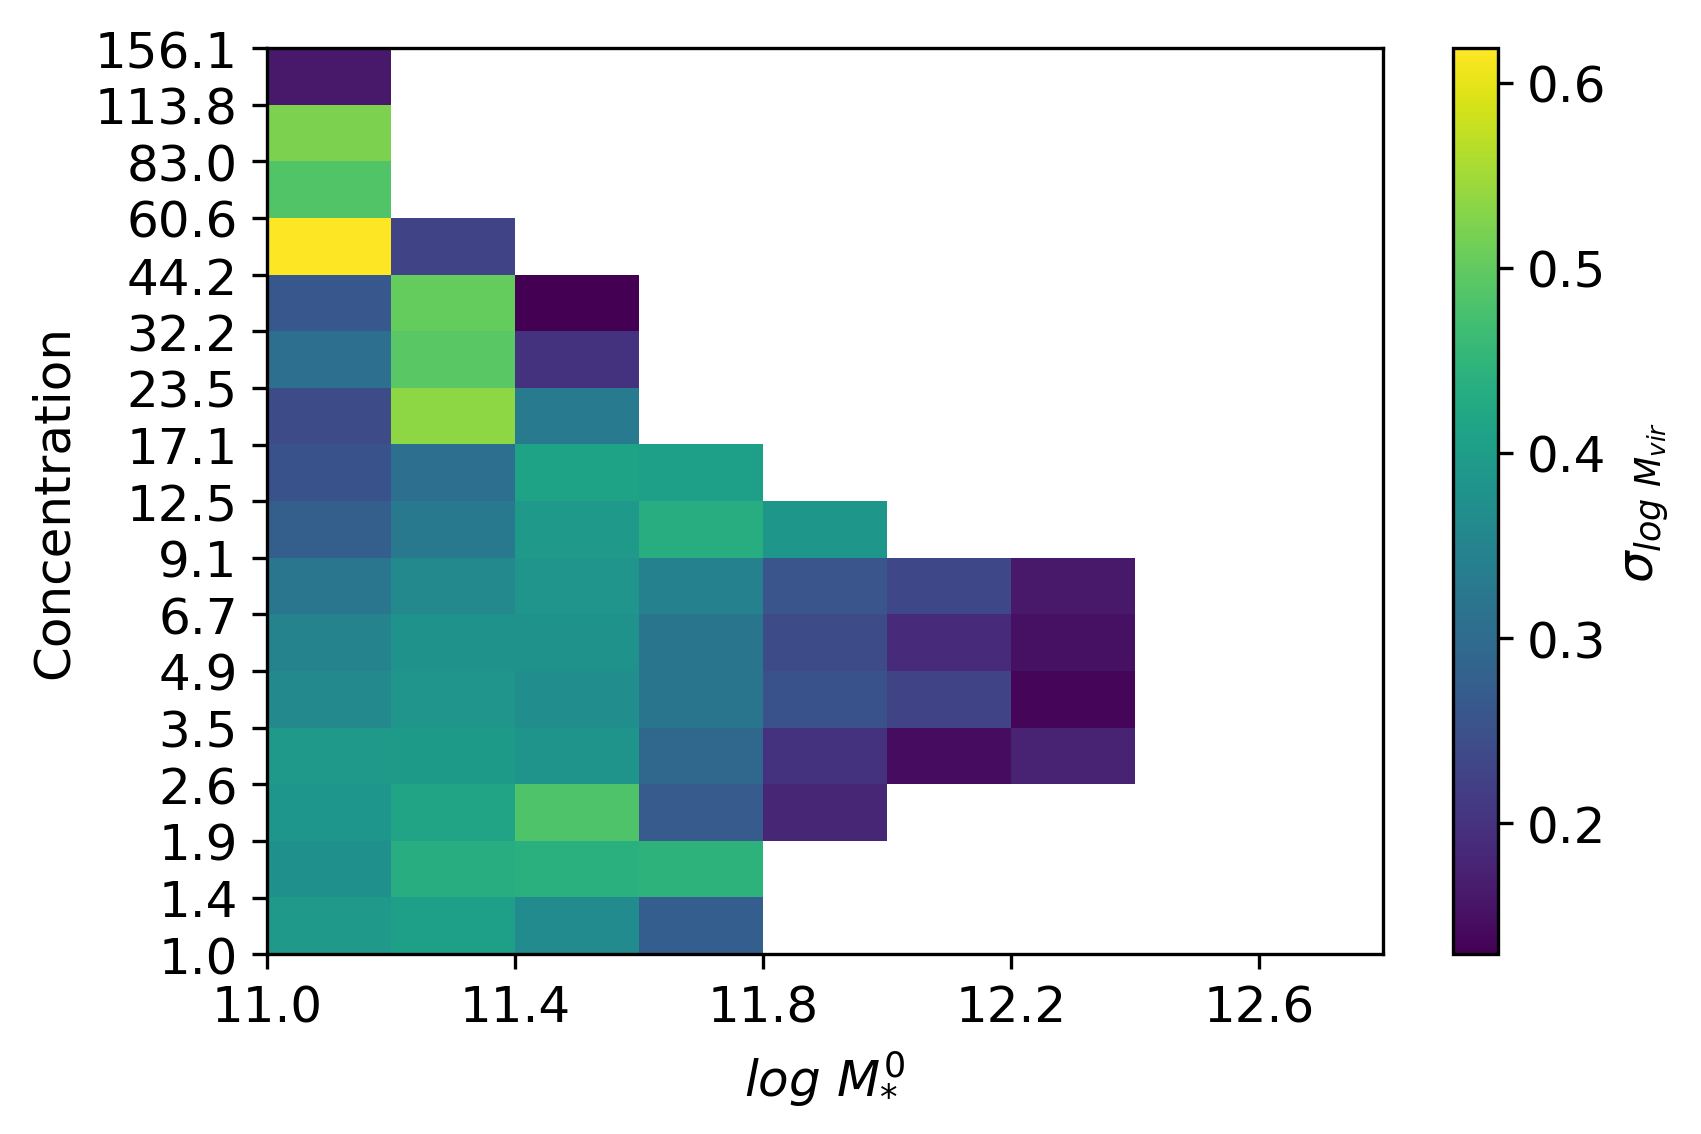

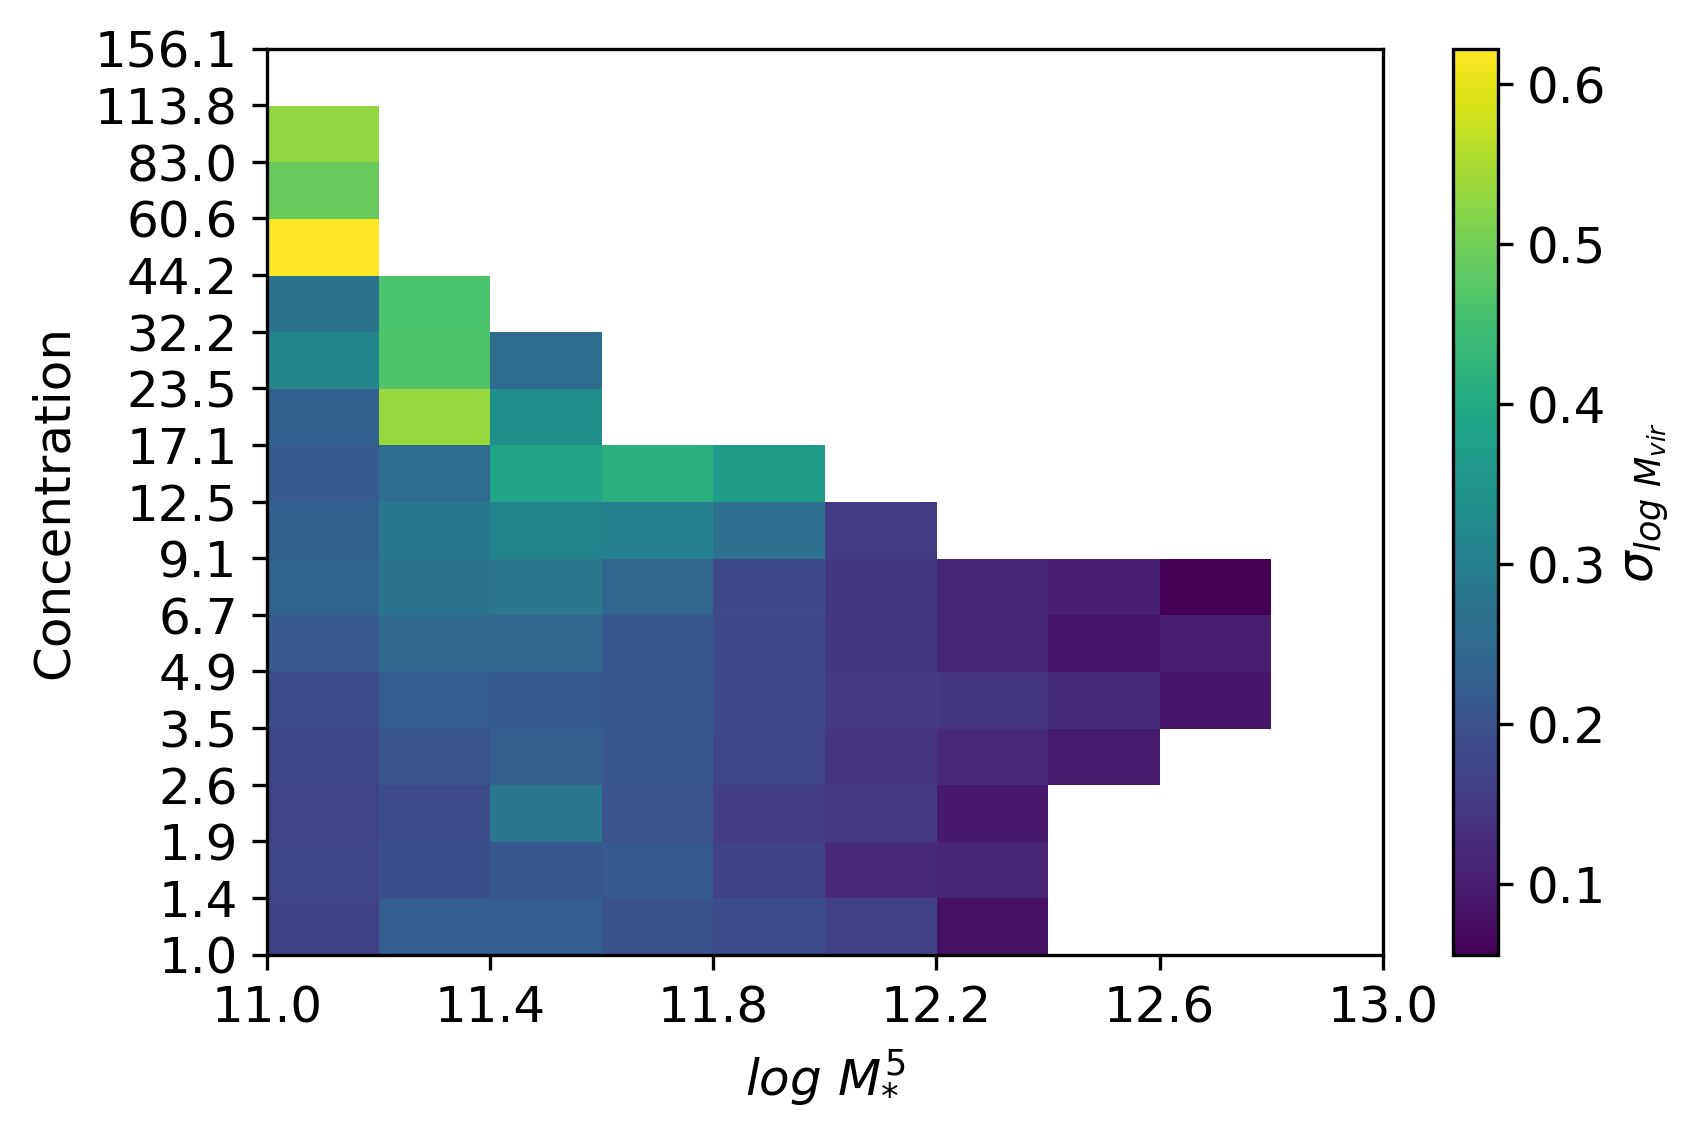

In [103]:
heatmaps.concentration_and_sm_vs_hm_scatter(data_stellar_cut[0]["data"], data_stellar_cut[0]["fit"], 0)
heatmaps.concentration_and_sm_vs_hm_scatter(data_stellar_cut[5]["data"], data_stellar_cut[5]["fit"], 5)

### Old

Just centrals
Total SM (including all sats)


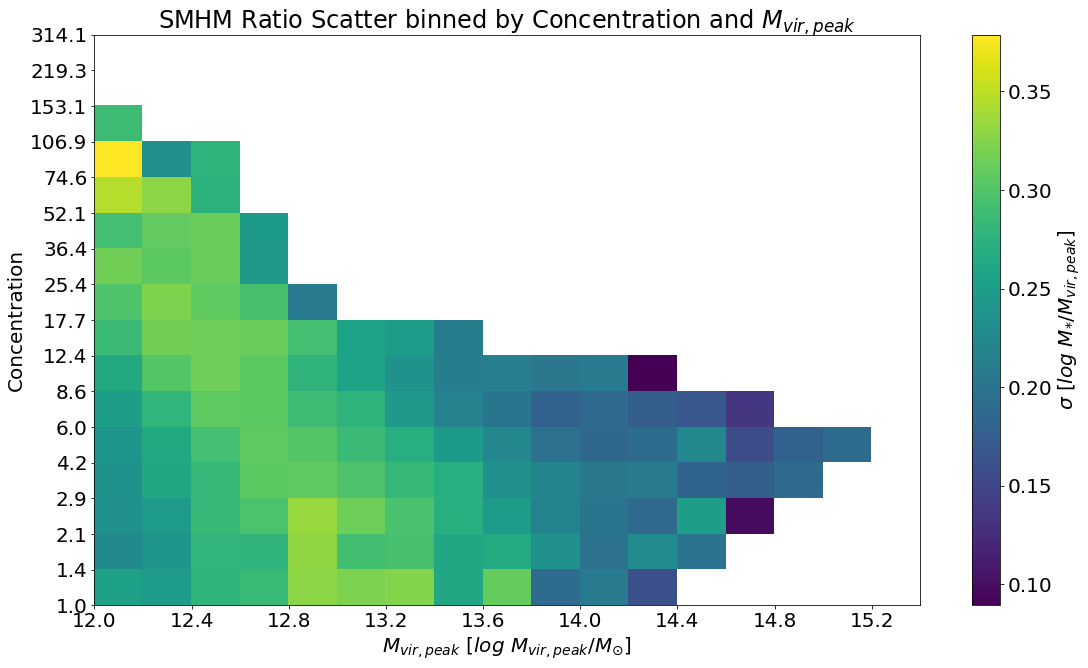

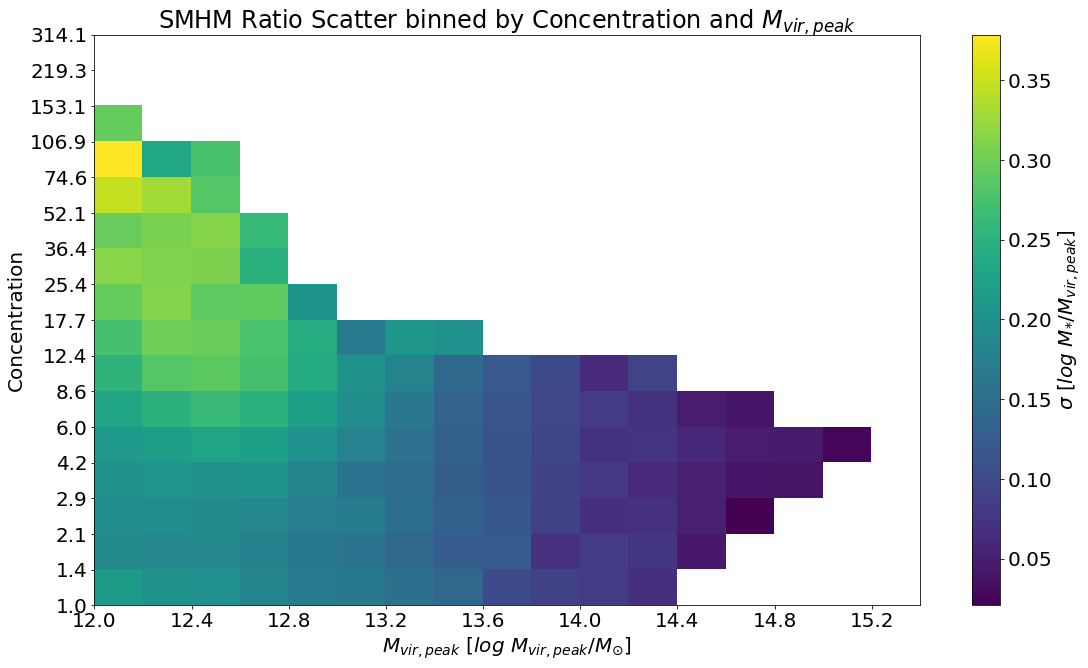

In [283]:
reload(plots)
# should probably have the centrals vs all in the title not just printed...
print("Just centrals")
plots.concentration_vs_scatter(centrals)
print("Total SM (including all sats)")
plots.concentration_vs_scatter(data["all"])

# Age

What about age?

In [548]:
print(data_halo_cut[0].dtype) # no obvious halfmass stellar scale

[('id', '<i8'), ('upid', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8'), ('mvir', '<f8'), ('rvir', '<f8'), ('rs', '<f8'), ('Halfmass_Scale', '<f8'), ('scale_of_last_MM', '<f8'), ('M200b', '<f8'), ('M200c', '<f8'), ('Acc_Rate_Inst', '<f8'), ('Acc_Rate_100Myr', '<f8'), ('Acc_Rate_1*Tdyn', '<f8'), ('Acc_Rate_2*Tdyn', '<f8'), ('Acc_Rate_Mpeak', '<f8'), ('Vmax@Mpeak', '<f8')]


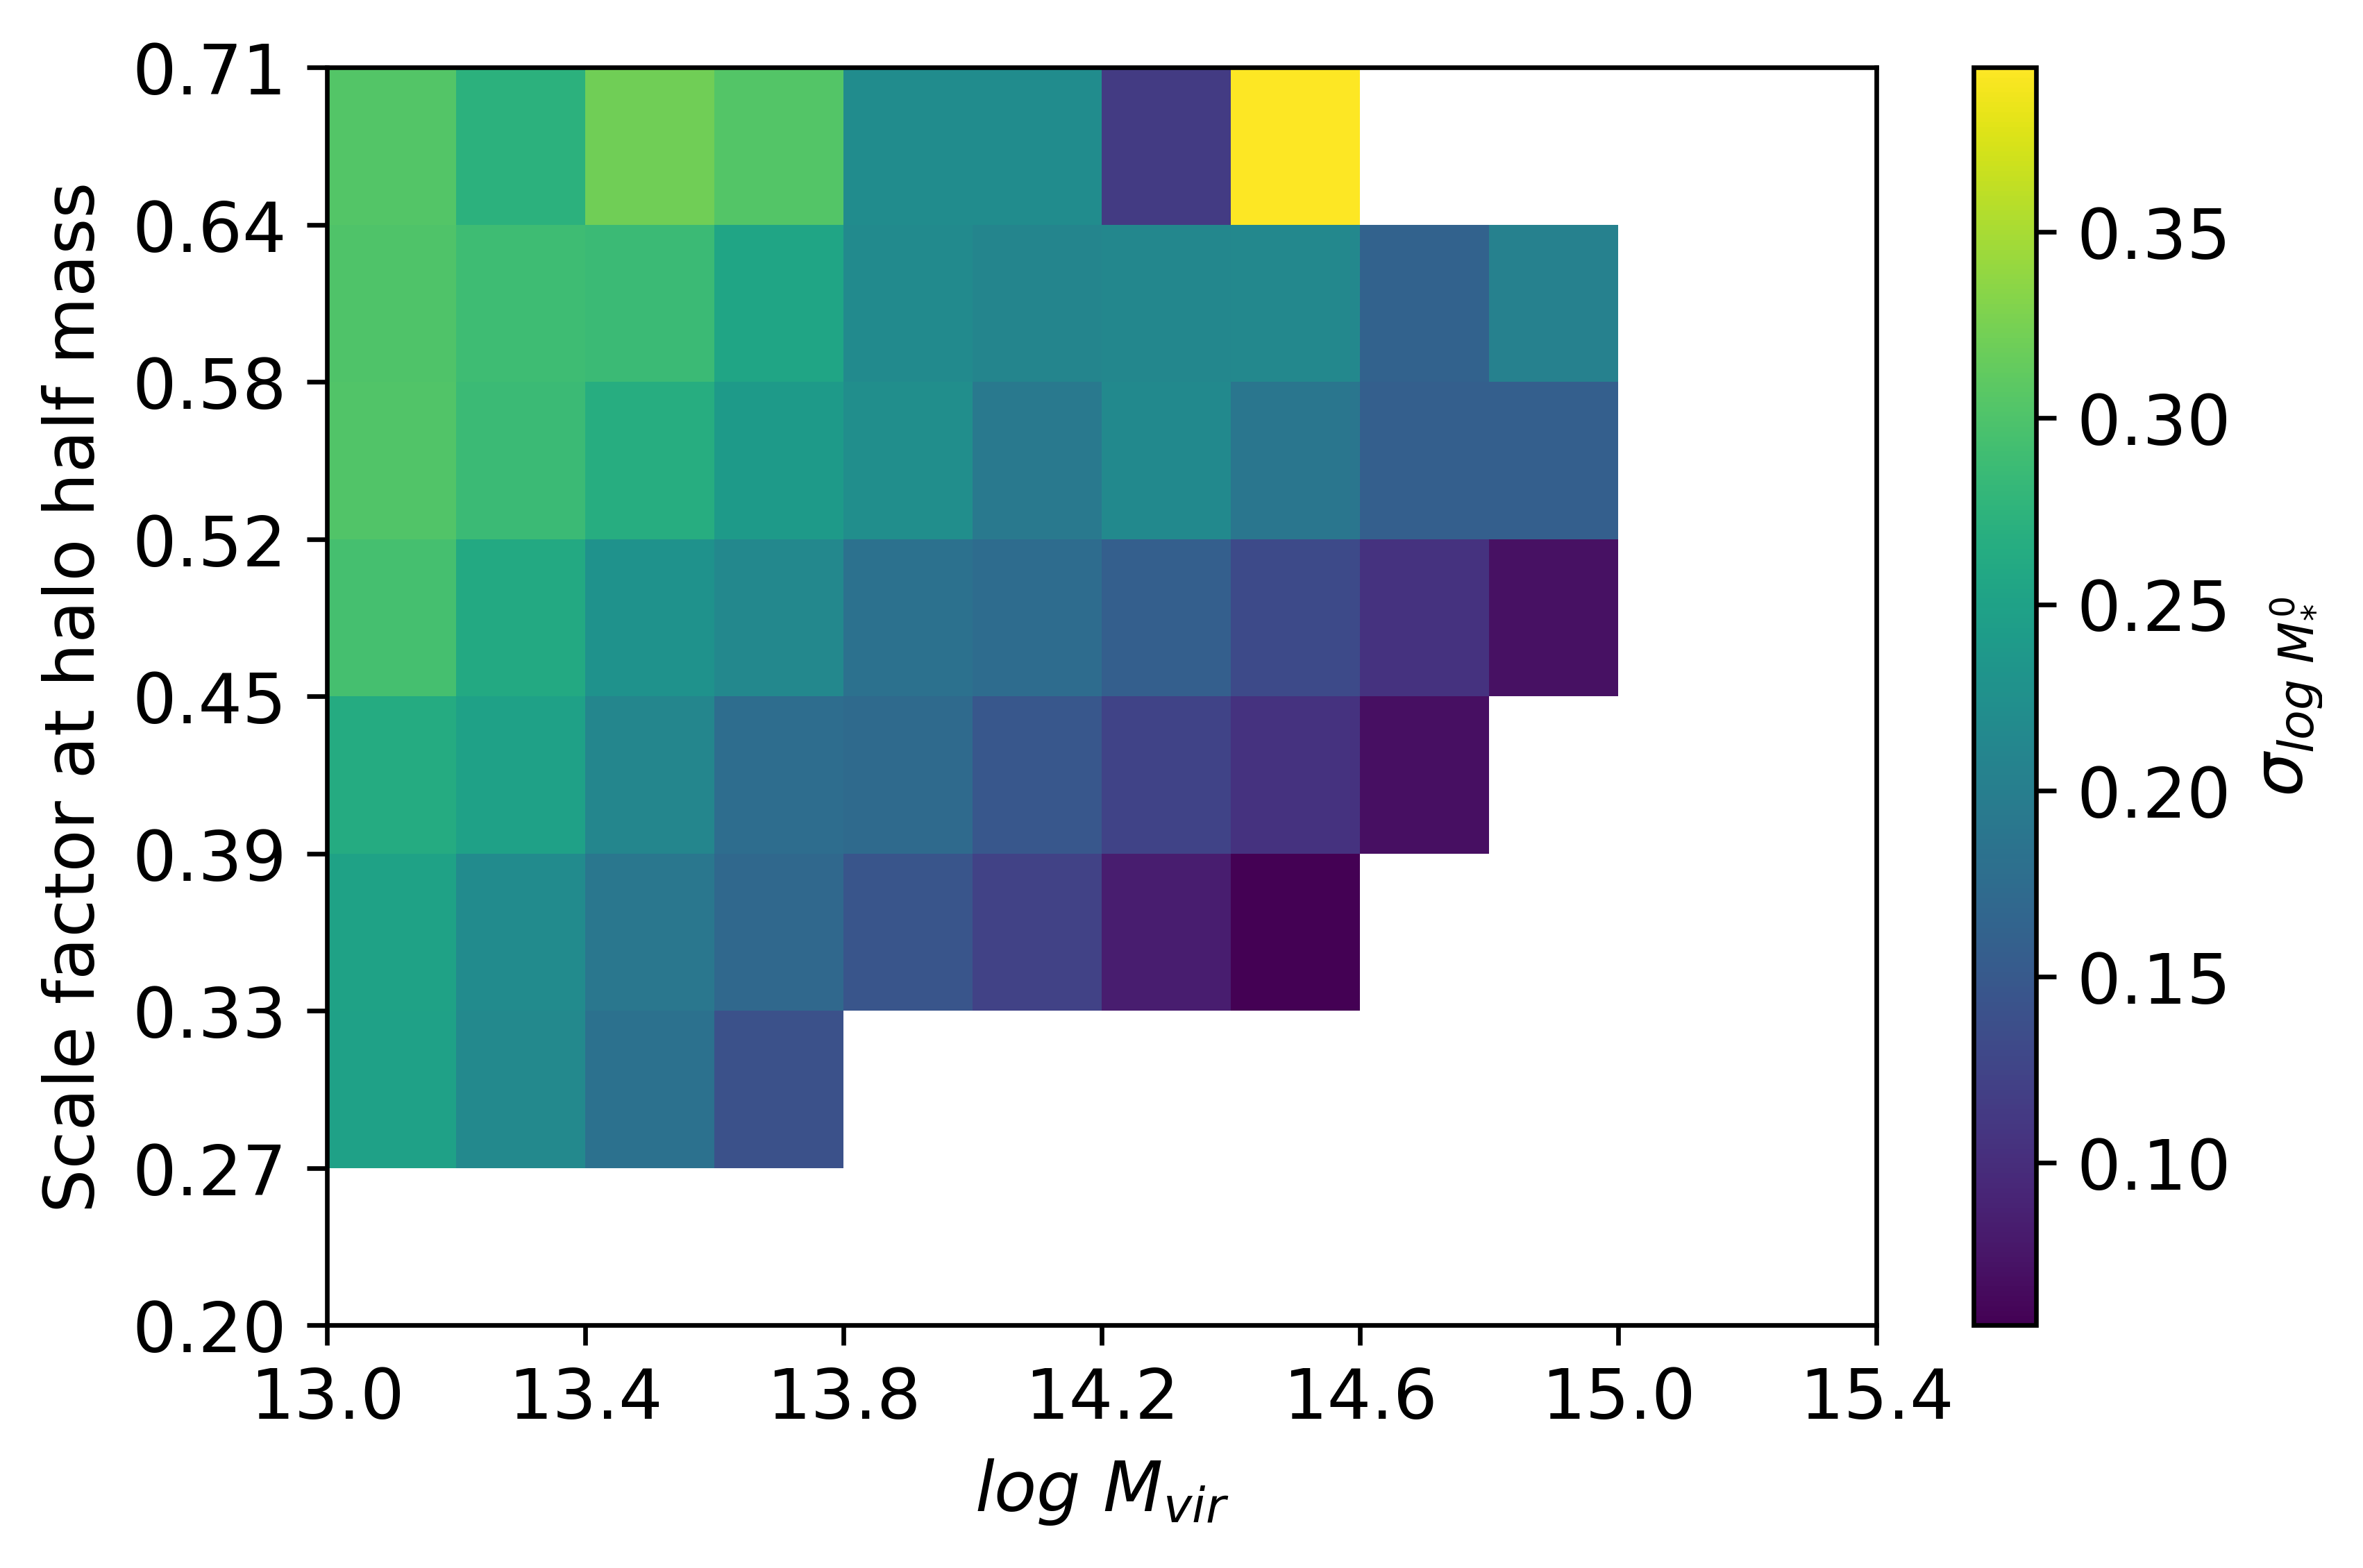

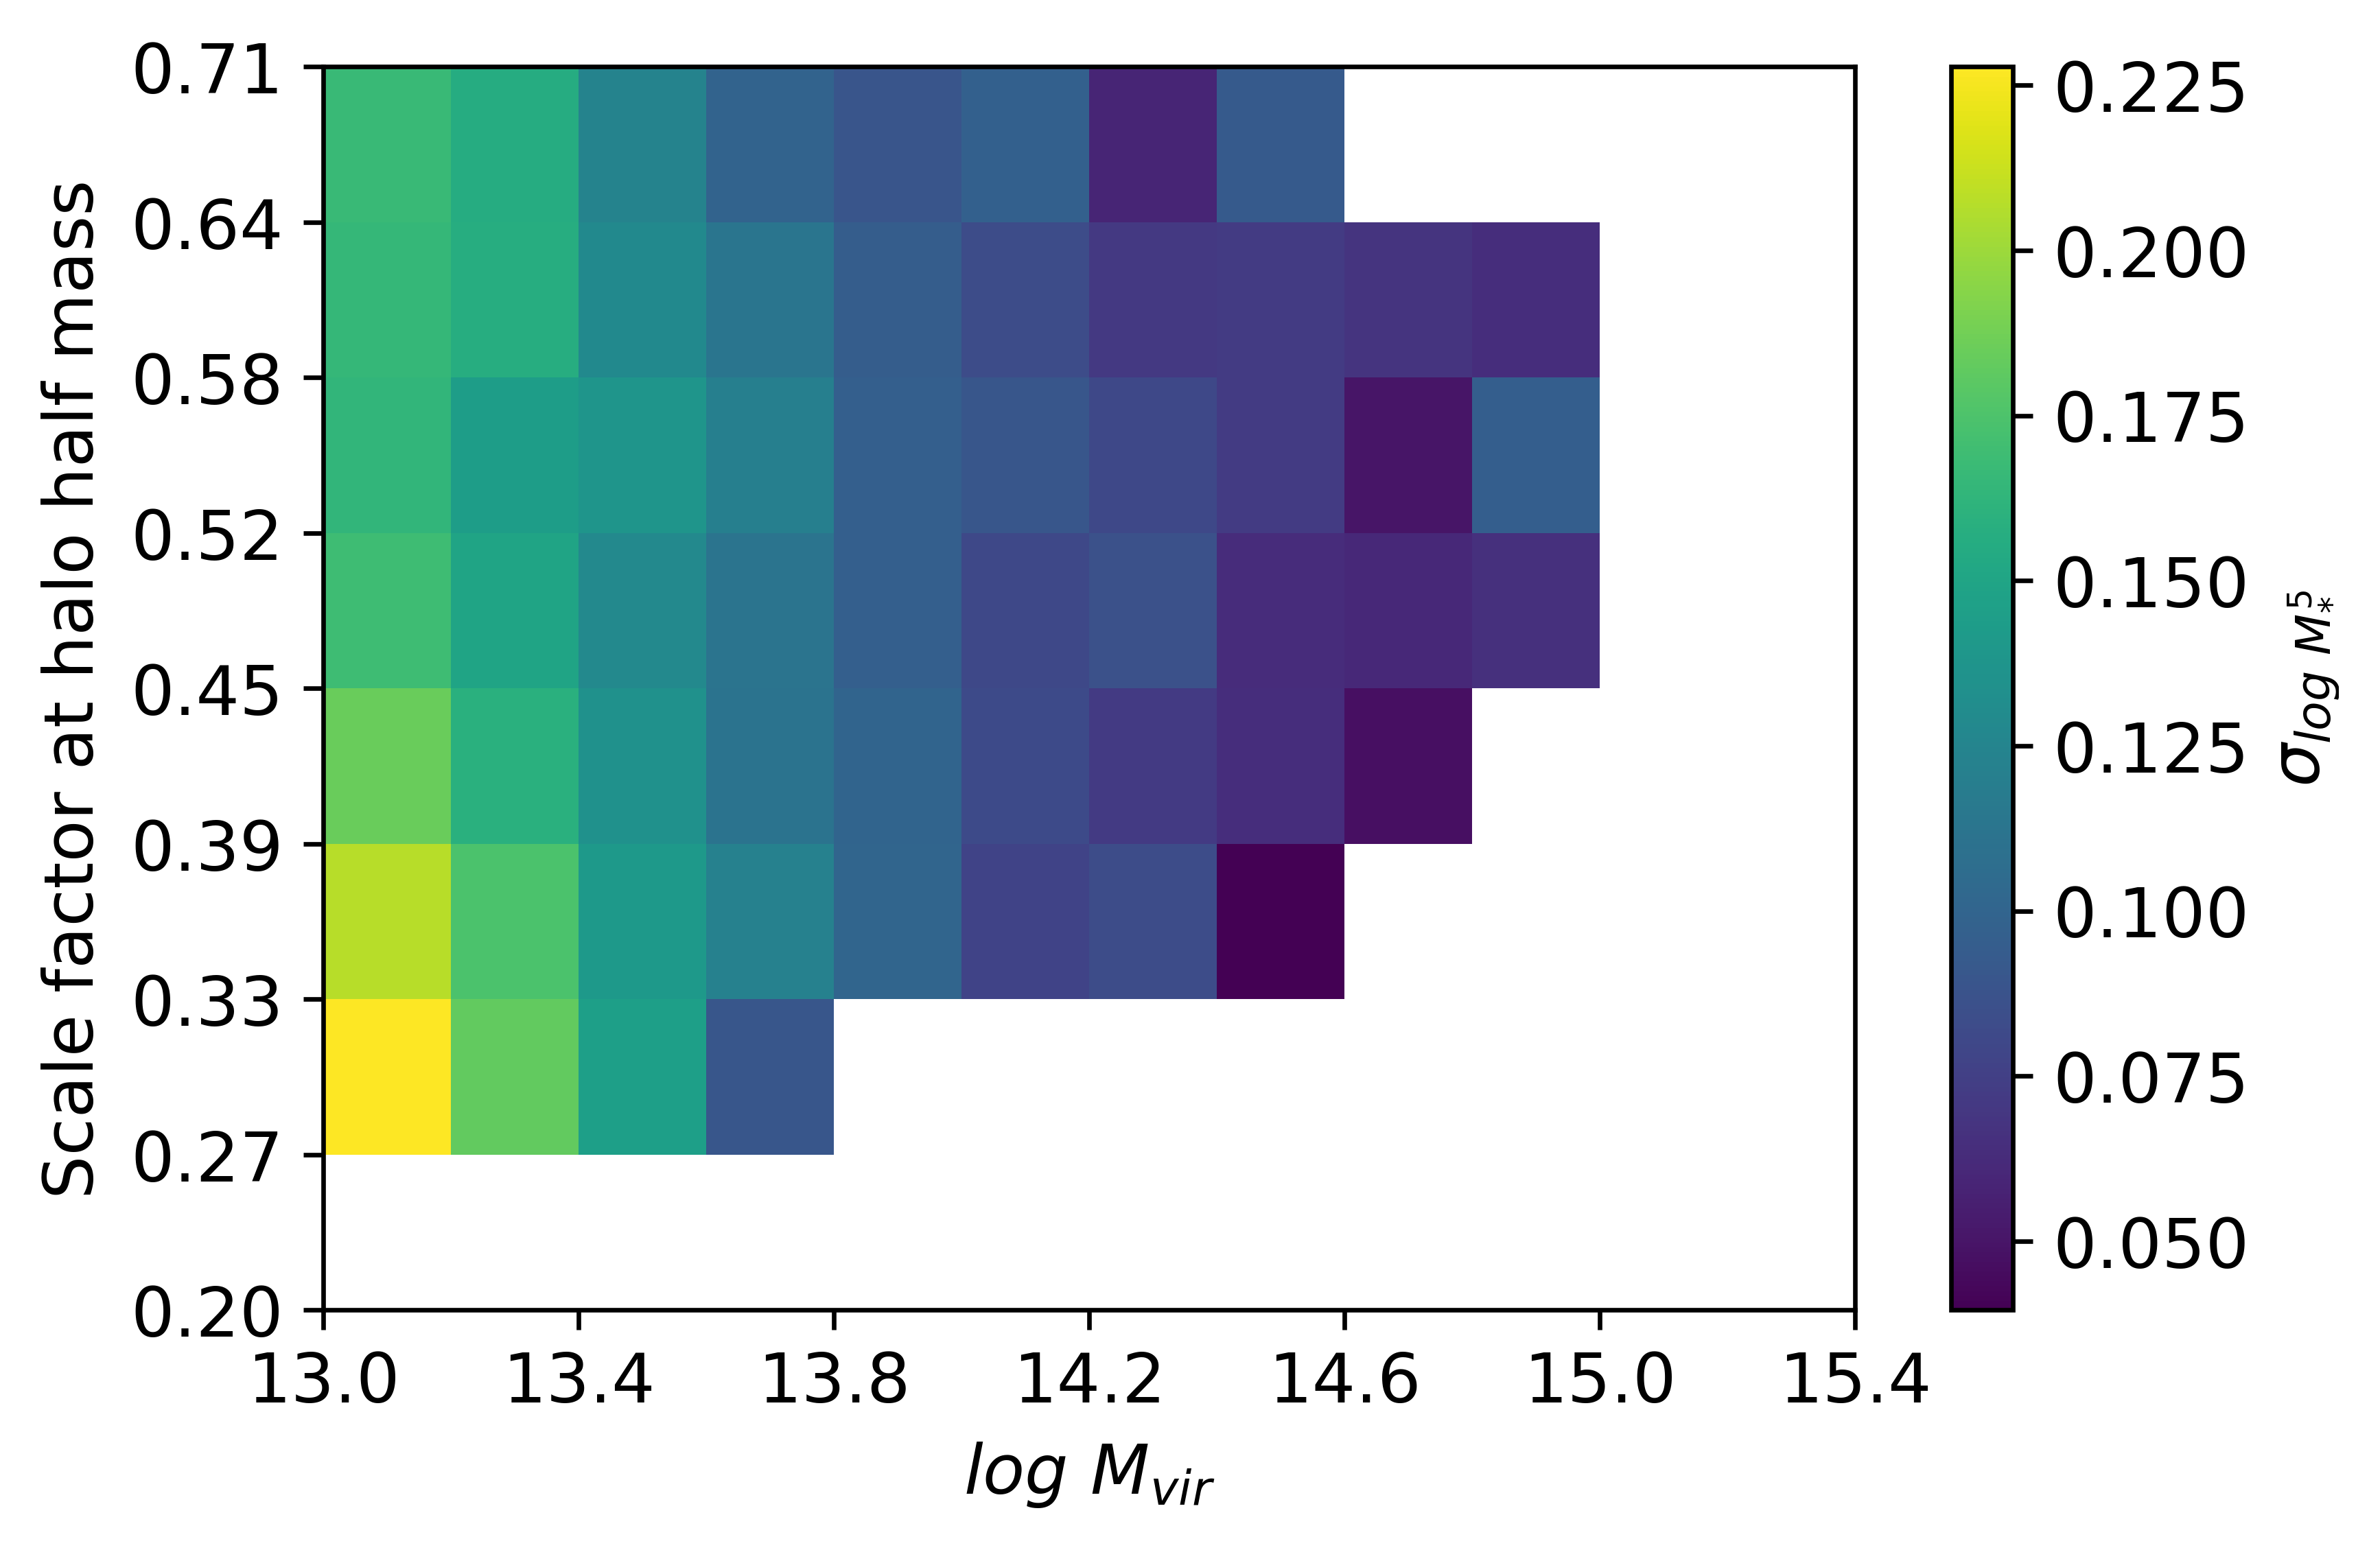

In [111]:
heatmaps.age_and_hm_vs_sm_scatter(data_halo_cut[0]["data"], data_halo_cut[0]["fit"], 0)
heatmaps.age_and_hm_vs_sm_scatter(data_halo_cut[5]["data"], data_halo_cut[5]["fit"], 5)

In [112]:
heatmaps.age_and_sm_vs_hm_scatter(data_stellar_cut[0]["data"], data_stellar_cut[0]["fit"])
heatmaps.age_and_sm_vs_hm_scatter(data_stellar_cut[5]["data"], data_stellar_cut[5]["fit"])

TypeError: age_and_sm_vs_hm_scatter() missing 1 required positional argument: 'n_sats'

# Major Mergers

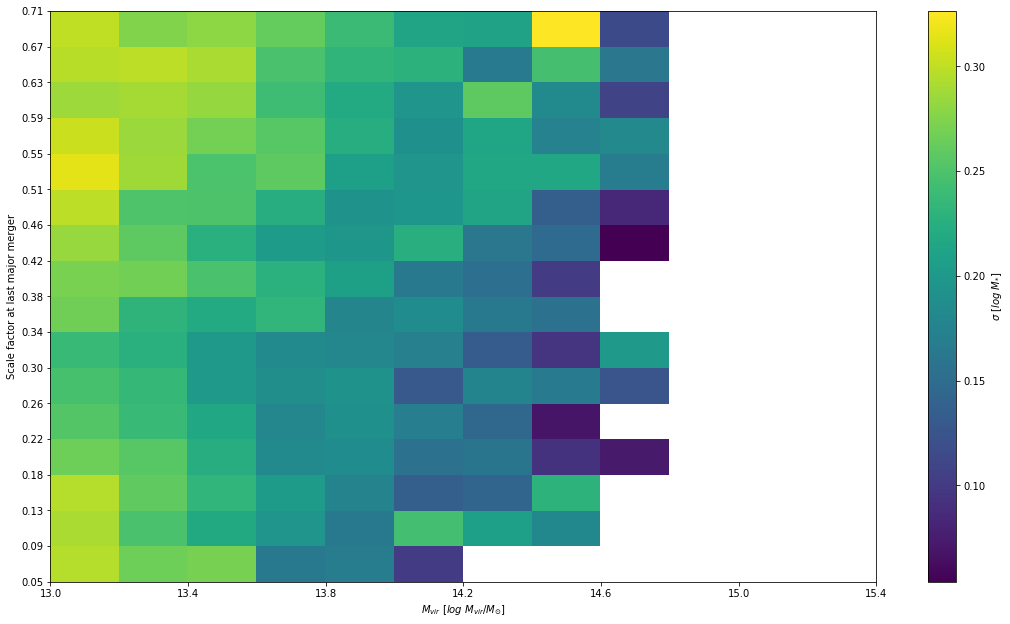

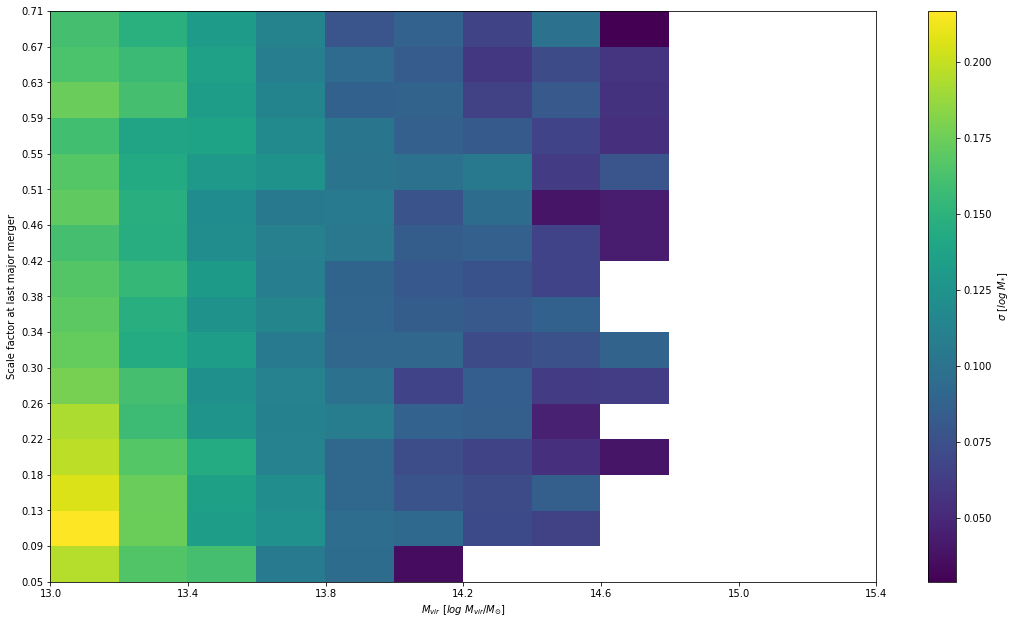

In [184]:
heatmaps.mm_and_hm_vs_sm_scatter(data_halo_cut[0]["data"], data_halo_cut[0]["fit"])
heatmaps.mm_and_hm_vs_sm_scatter(data_halo_cut[5]["data"], data_halo_cut[5]["fit"])

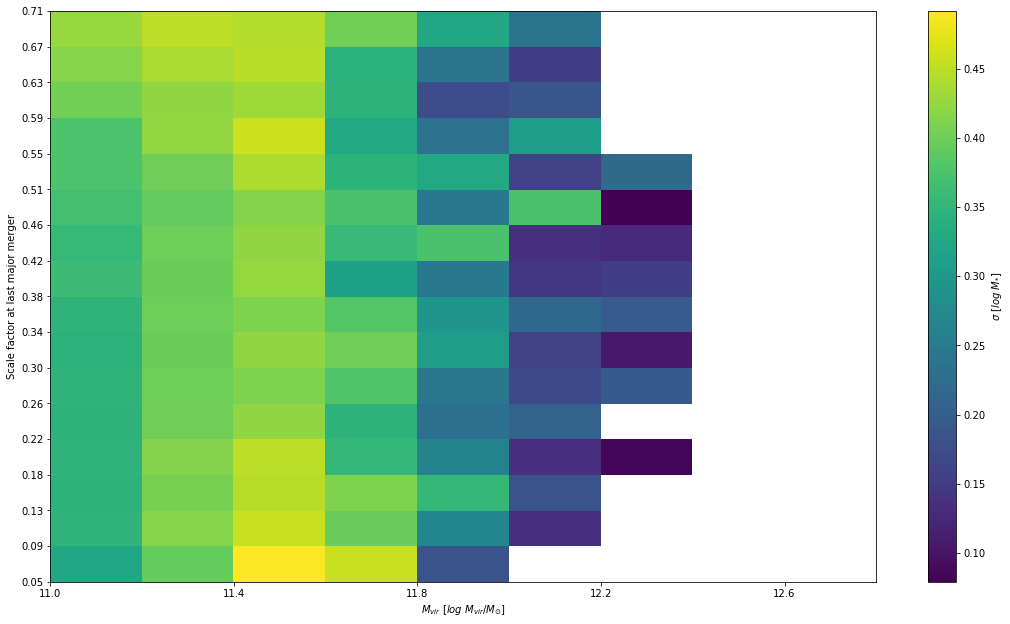

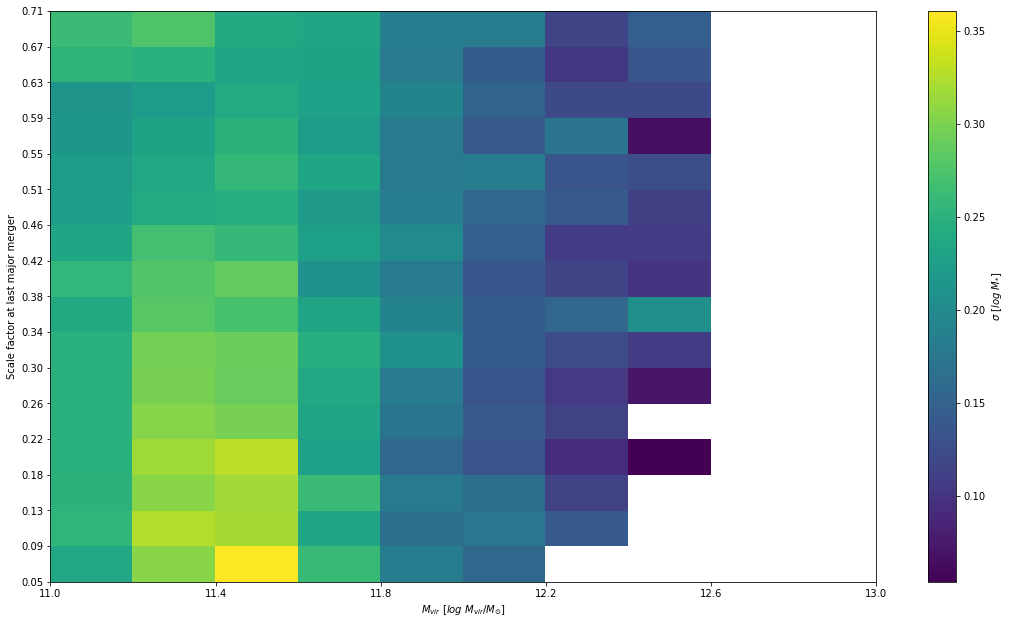

In [183]:
heatmaps.mm_and_sm_vs_hm_scatter(data_stellar_cut[0]["data"], data_stellar_cut[0]["fit"])
heatmaps.mm_and_sm_vs_hm_scatter(data_stellar_cut[5]["data"], data_stellar_cut[5]["fit"])

# Comparison of secondary feature distribution

Let's look at how a selection on stellar mass could bias the secondary features.
1. Select a sample by cutting on some variant of SM
2. Select a sample by matching the halo mass distribution of 1
3. Compare features of 1 and 2

central cuts of (11.8, 12), halo cuts of (12.298320514415717, 12.543750560072244)
872
Bin width is 0.039629056716972144
715
Bin width is 0.020833326443183253
872
Bin width is 0.039629056716972144
715
Bin width is 0.020833326443183253


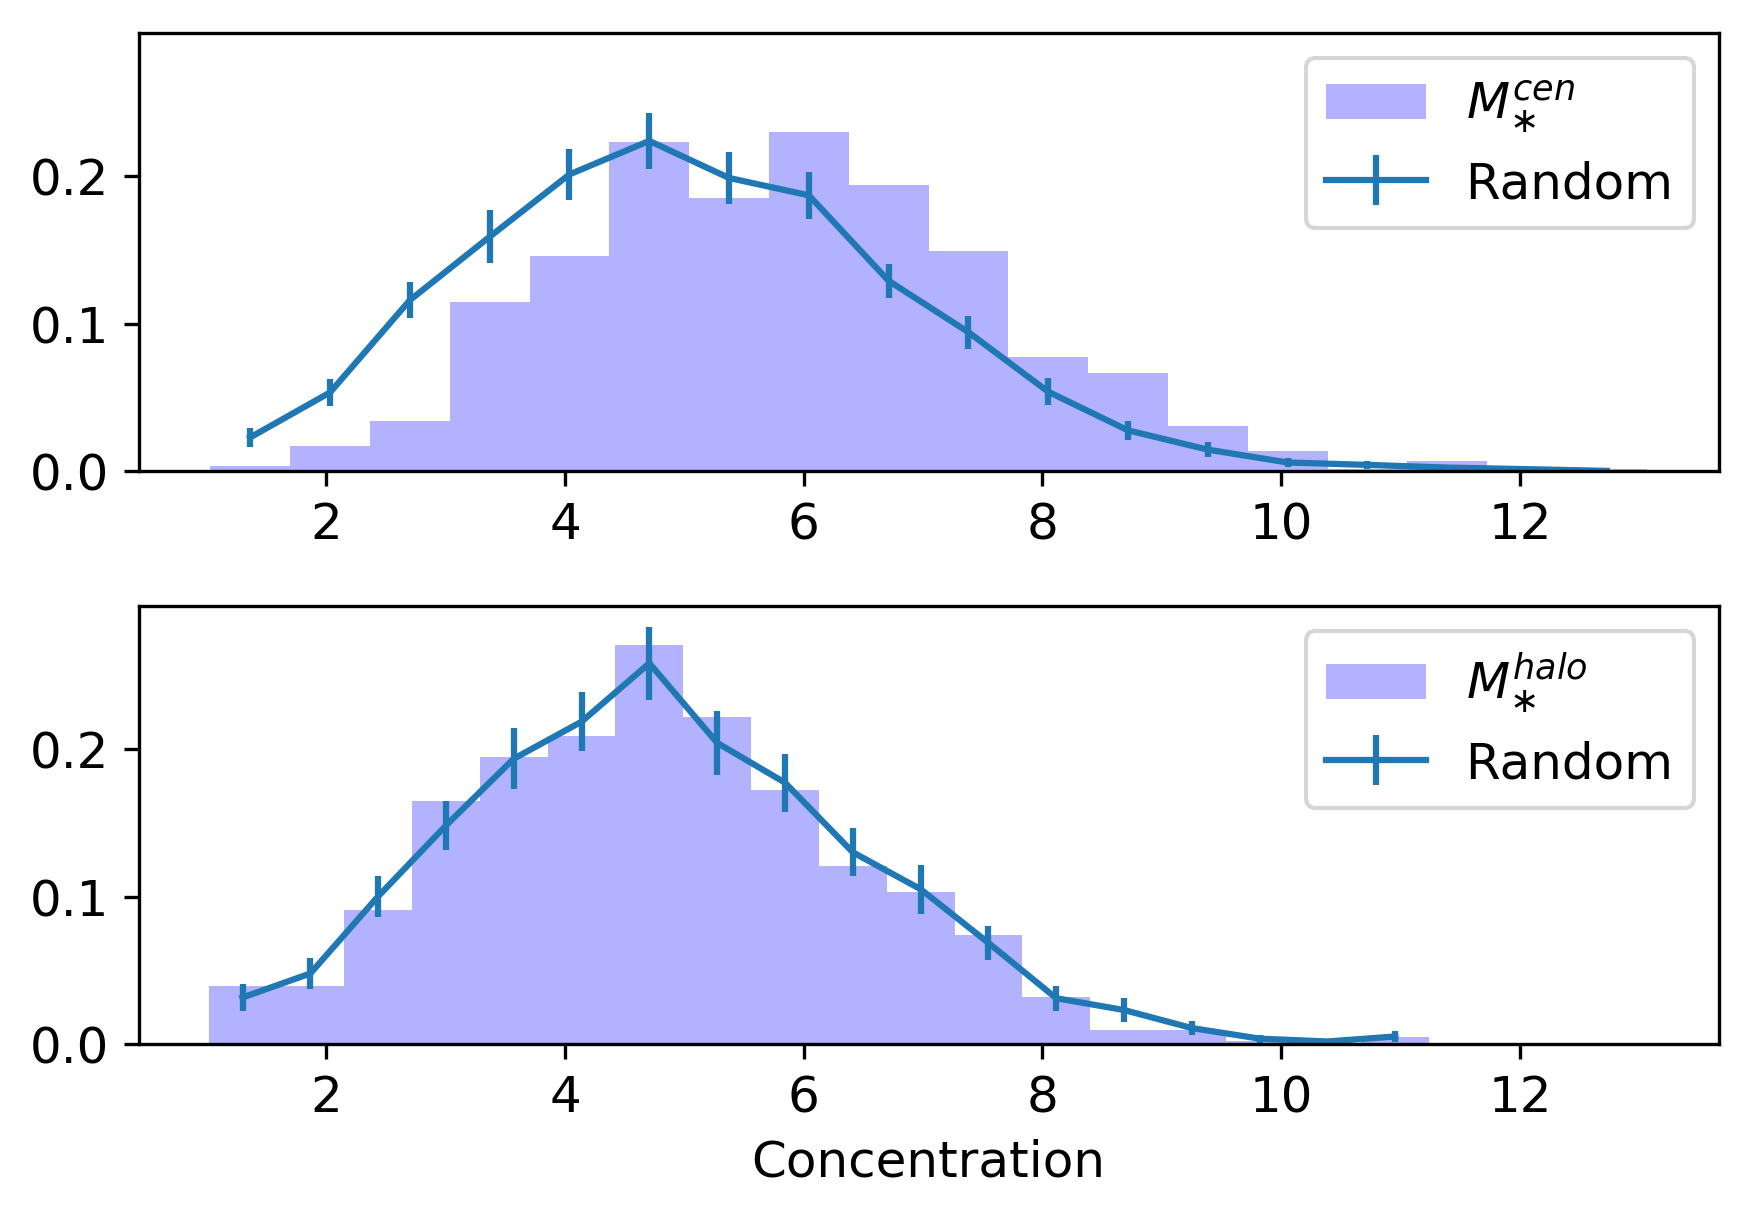

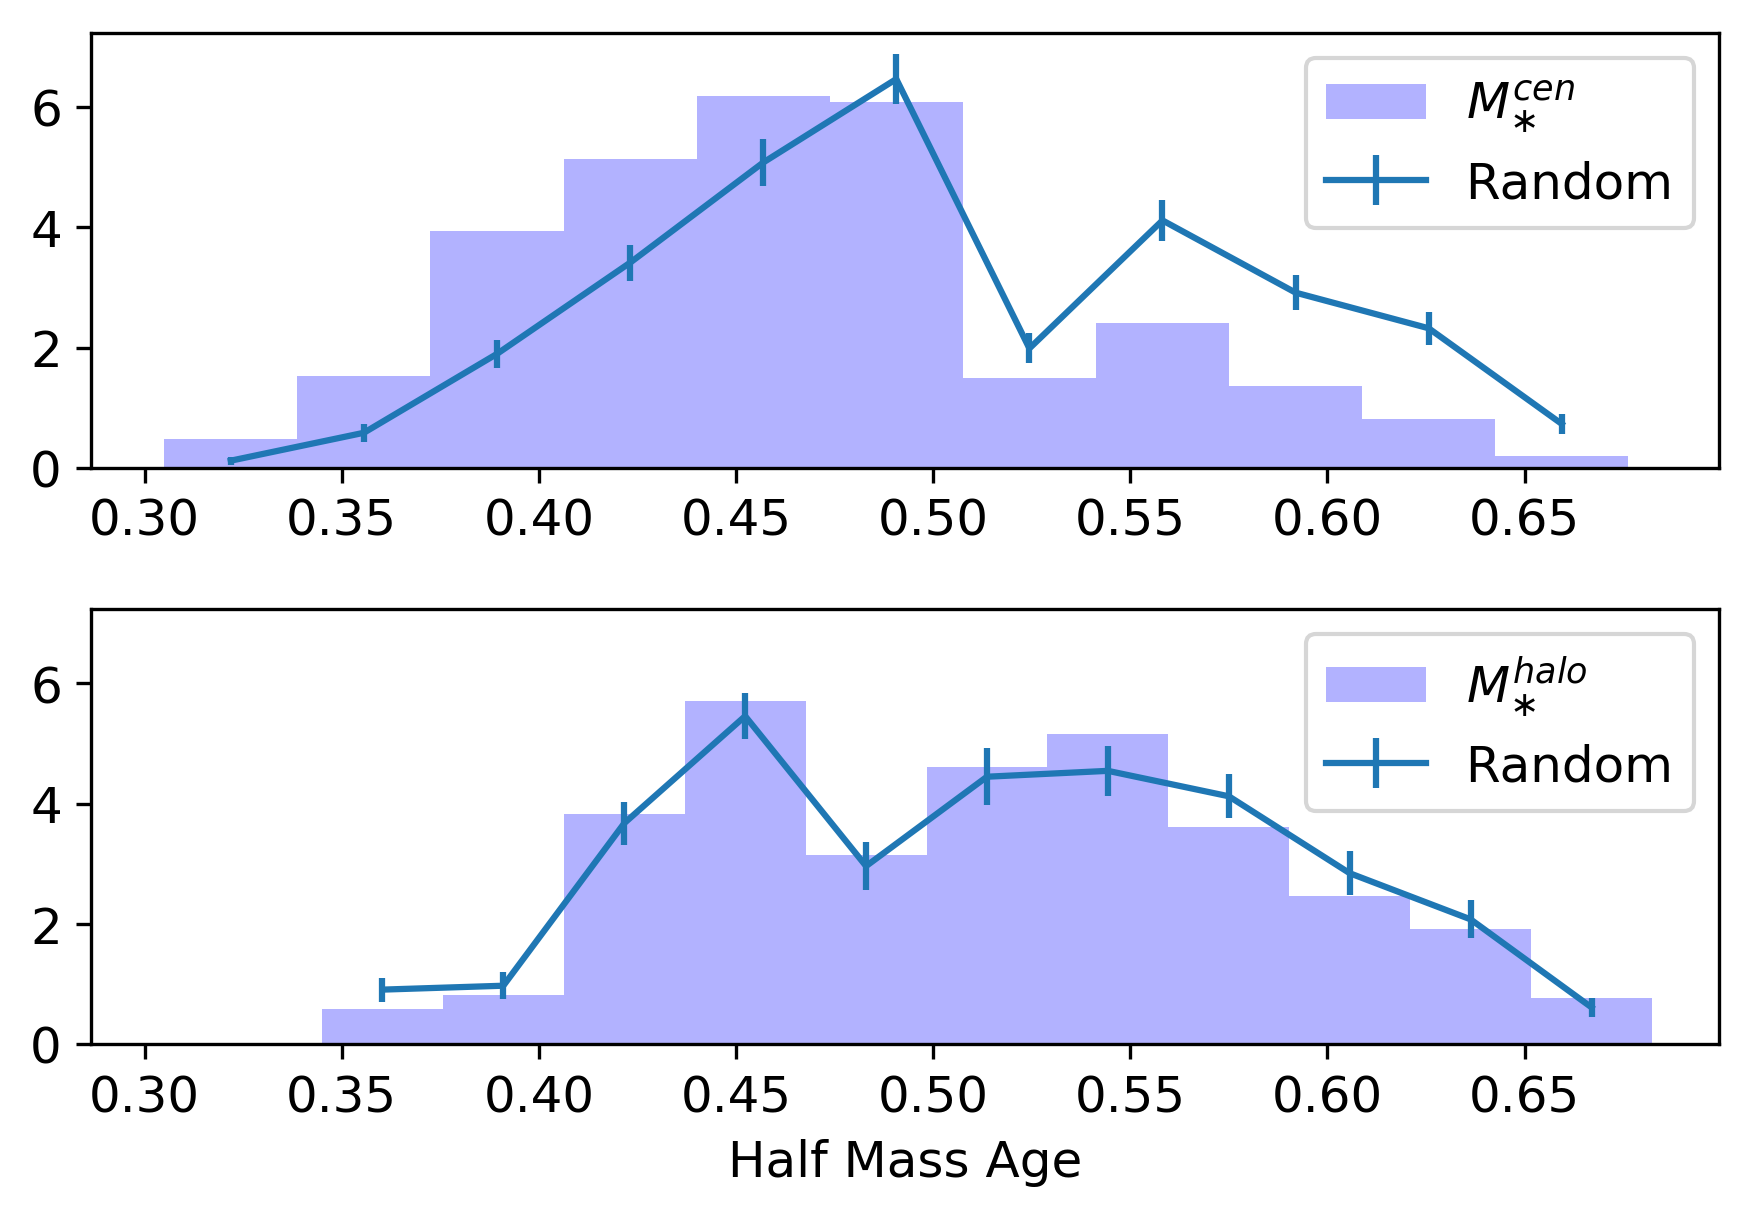

In [175]:
cen_cuts = (11.8, 12)
halo_cuts = tuple(fits.mass_at_density(data_halo_cut, "halo", fits.density_at_mass(
        data_halo_cut, "cen", m)) for m in cen_cuts)
print("central cuts of {}, halo cuts of {}".format(cen_cuts, halo_cuts))

_, axes = plt.subplots(2, 1)
p.same_hm_dist_plots.do_everything(data_halo_cut, "cen", p.same_hm_dist_plots.f_concentration, cuts=cen_cuts, ax=axes[0])
p.same_hm_dist_plots.do_everything(data_halo_cut, "halo", p.same_hm_dist_plots.f_concentration, cuts=halo_cuts, ax=axes[1])
plt.tight_layout()
axes[1].set(**{"xlabel": "Concentration"})
for ax in [axes[0], axes[1]]:
    ax.set(**{"xlim": (min(axes[0].get_xlim()[0], axes[1].get_xlim()[0]), max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])), 
              "ylim": (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))})


# You need to think about how you are binning this.
_, axes = plt.subplots(2, 1)
p.same_hm_dist_plots.do_everything(data_halo_cut, "cen", p.same_hm_dist_plots.f_age, cuts=cen_cuts, ax=axes[0], bins=11)
p.same_hm_dist_plots.do_everything(data_halo_cut, "halo", p.same_hm_dist_plots.f_age, cuts=halo_cuts, ax=axes[1], bins=11)
plt.tight_layout()
axes[1].set(**{"xlabel": "Half Mass Age"})
for ax in [axes[0], axes[1]]:
    ax.set(**{"xlim": (min(axes[0].get_xlim()[0], axes[1].get_xlim()[0]), max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])), 
              "ylim": (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))})
"""
_, axes = plt.subplots(1, 2)
ax = same_hm_dist_plots.do_everything(data_halo_cut, "cen", same_hm_dist_plots.f_mm, cuts=(11.8, 12), bulk_set={"xlabel": "Scale at last MM"}, ax=axes[0])
ax = same_hm_dist_plots.do_everything(data_halo_cut, "halo", same_hm_dist_plots.f_mm, cuts=(11.8, 12), bulk_set={"xlabel": "Scale at last MM"}, ax=axes[1])
plt.tight_layout()
"""
None